# ƒ∞MPORT Lƒ∞BRARƒ∞ES

Layih…ôd…ô istifad…ô olunacaq Python kitabxanalarƒ± y√ºkl…ônir.

M…ôs…ôl…ôn: pandas, numpy, matplotlib, seaborn, scikit-learn v…ô s.

Bu m…ôrh…ôl…ô kodun i≈ül…ôm…ôsi √º√ß√ºn …ôsasdƒ±r.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtc, plot_tree, export_graphviz
import pydotplus
from IPython.display import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler ,  MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
import joblib
from imblearn.under_sampling import RandomUnderSampler

# UPLOAD DATA

Dataset y√ºkl…ônir (CSV, Excel, SQL, API v…ô ya dig…ôr m…ônb…ôl…ôrd…ôn).

Fayl yolundan v…ô ya serverd…ôn m…ôlumatlar alƒ±nƒ±r.

ƒ∞lk baxƒ±≈ü √º√ß√ºn m…ôlumatƒ±n qƒ±sa hiss…ôsi g√∂st…ôril…ô bil…ôr (head(), tail()).

Data set link - Kaggle
https://www.kaggle.com/datasets/ayushkumarnamdeo/dataset-for-bank-loan-fraud-detection-system

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/account_data.csv")

ƒ∞lk 5 s…ôtir

In [ ]:
df.head()

Age          Occupation MaritalStatus  Dependents  ResidentialStatus  \
0   56             Teacher      Divorced           4                Own   
1   40            Engineer        Single           0               Rent   
2   25               Clerk       Married           0  Live with Parents   
3   34          Unemployed        Single           0               Rent   
4   47  Software Developer        Single           0               Rent   

   AddressDuration  CreditScore  IncomeLevel  LoanAmountRequested  LoanTerm  \
0                1          827        52033               300000        25   
1                1          830        42893                 8105         3   
2              360          809       141233                75734        19   
3               92          630         9217                 2000         1   
4               26          733        47979                67767         1   

   ... AccountActivity PaymentBehavior  Blacklists  EmploymentVerification  \
0  ...          Normal         On-time          No                Verified   
1  ...          Normal         On-time          No                Verified   
2  ...          Normal         On-time         Yes                Verified   
3  ...         Unusual       Defaulted          No            Not Verified   
4  ...          Normal         On-time          No                Verified   

   PastFinancialMalpractices DeviceInformation SocialMediaFootprint  \
0                         No            Tablet                  Yes   
1                         No            Laptop                   No   
2                         No            Laptop                   No   
3                        Yes            Mobile                   No   
4                         No            Laptop                   No   

  ConsistencyinData  Referral IsFraud  
0        Consistent  Referral      No  
1        Consistent    Online      No  
2        Consistent  Referral      No  
3      Inconsistent    Online     Yes  
4        Consistent    Online      No  

[5 rows x 29 columns]

son 5 s…ôtir

In [ ]:
df.tail()

Age     Occupation MaritalStatus  Dependents ResidentialStatus  \
9995   53         Doctor      Divorced           0               Own   
9996   56  Self-employed        Single           1               Own   
9997   22        Student        Single           0              Rent   
9998   40  Self-employed        Single           0              Rent   
9999   56        Manager      Divorced           1               Own   

      AddressDuration  CreditScore  IncomeLevel  LoanAmountRequested  \
9995              134          749       109835                 2000   
9996                1          749        65018                66029   
9997               85          811            0                 2000   
9998                1          757         6907                 7352   
9999                1          807        62989               300000   

      LoanTerm  ... AccountActivity PaymentBehavior  Blacklists  \
9995        24  ...          Normal         On-time          No   
9996         5  ...          Normal            Late          No   
9997         1  ...          Normal       Defaulted         Yes   
9998        12  ...          Normal       Defaulted          No   
9999        27  ...          Normal            Late          No   

      EmploymentVerification  PastFinancialMalpractices DeviceInformation  \
9995                Verified                         No           Desktop   
9996                Verified                         No           Desktop   
9997            Not Verified                         No            Mobile   
9998            Not Verified                         No            Mobile   
9999                Verified                         No           Desktop   

     SocialMediaFootprint ConsistencyinData  Referral IsFraud  
9995                   No        Consistent  Referral      No  
9996                   No        Consistent  Referral      No  
9997                   No      Inconsistent    Online     Yes  
9998                  Yes      Inconsistent    Online     Yes  
9999                   No        Consistent  Referral      No  

[5 rows x 29 columns]

Burada ilk √∂nc…ô datamƒ±zƒ±n target s√ºtununun balanslƒ± olub olmamasƒ±nƒ± yoxlayƒ±rƒ±q.

In [ ]:
import plotly.express as px
labels=["Genuine","Fraud"]

fraud_or_not = df["IsFraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['IsFraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

# GETTING TO KNOW DATA (Data Understanding)

Datasetin √ºmumi qurulu≈üu √∂yr…ônilir: ne√ß…ô satƒ±r/s√ºtun var (shape).

S√ºtunlarƒ±n adlarƒ±, tipl…ôri (dtypes), v…ô qƒ±sa t…ôsviri (info(), describe()) g√∂t√ºr√ºl√ºr.

Kategorik v…ô sayƒ±sal d…ôyi≈ü…ônl…ôr ayrƒ±lƒ±r.

M…ôlumatda ola bil…ôc…ôk bo≈ü, unikal, t…ôkrarlanan d…ôy…ôrl…ôr yoxlanƒ±lƒ±r.

S…ôtir v…ô s√ºt√ºn sayƒ± √∂yr…ônilir

In [ ]:
rows, columns = df.shape
print(f"Datasetd…ô {rows} s…ôtir v…ô {columns} s√ºtun var.")

Datasetd…ô 10000 s…ôtir v…ô 29 s√ºtun var.


Datada olan s√ºtunlar v…ô onlarƒ±n data tipi haqqƒ±nda m…ôlumat alƒ±nƒ±r

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

H…ôr s√ºtun √º√ß√ºn statistik g√∂st…ôricil…ôr …ôld…ô edilir.

In [ ]:
df.describe()

Age    Dependents  AddressDuration   CreditScore  \
count  10000.000000  10000.000000     10000.000000  10000.000000   
mean      34.837900      1.323400        69.087400    768.701300   
std       12.631048      1.506399        84.854114     74.280933   
min       22.000000      0.000000         1.000000    580.000000   
25%       22.000000      0.000000         1.000000    721.000000   
50%       31.000000      1.000000        50.000000    801.000000   
75%       45.000000      2.000000        86.000000    830.000000   
max       56.000000      4.000000       360.000000    830.000000   

         IncomeLevel  LoanAmountRequested      LoanTerm  InterestRate  \
count   10000.000000         10000.000000  10000.000000  10000.000000   
mean    45994.615600         57218.915600     13.847700      5.149970   
std     44648.184654         72897.716564     10.923508      0.973665   
min         0.000000          2000.000000      1.000000      4.500000   
25%      8277.500000         10555.000000      2.000000      4.500000   
50%     32791.000000         44008.500000     13.000000      4.500000   
75%     71698.000000         68073.750000     24.000000      5.600000   
max    150000.000000        300000.000000     30.000000      8.000000   

       PreviousLoans  ExistingLiabilities  
count   10000.000000         10000.000000  
mean        1.656900          3046.742500  
std         1.172996          2091.148502  
min         0.000000             0.000000  
25%         1.000000          1222.000000  
50%         1.000000          3231.000000  
75%         2.000000          4545.250000  
max         4.000000          7000.000000

Datasetd…ô m√∂vcud olan s√ºtun adlarƒ± list halƒ±nda g√∂st…ôrilir.

In [ ]:
print(df.columns.tolist())

['Age', 'Occupation', 'MaritalStatus', 'Dependents', 'ResidentialStatus', 'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested', 'LoanTerm', 'PurposeoftheLoan', 'Collateral', 'InterestRate', 'PreviousLoans', 'ExistingLiabilities', 'ApplicationBehavior', 'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud']


Datasetd…ôki s√ºtunlarƒ±n tipl…ôri √∂yr…ônilir.

In [ ]:
df.dtypes

Age                            int64
Occupation                    object
MaritalStatus                 object
Dependents                     int64
ResidentialStatus             object
AddressDuration                int64
CreditScore                    int64
IncomeLevel                    int64
LoanAmountRequested            int64
LoanTerm                       int64
PurposeoftheLoan              object
Collateral                    object
InterestRate                 float64
PreviousLoans                  int64
ExistingLiabilities            int64
ApplicationBehavior           object
LocationofApplication         object
ChangeinBehavior              object
TimeofTransaction             object
AccountActivity               object
PaymentBehavior               object
Blacklists                    object
EmploymentVerification        object
PastFinancialMalpractices     object
DeviceInformation             object
SocialMediaFootprint          object
ConsistencyinData             object
Referral                      object
IsFraud                       object
dtype: object

Categorical v…ô object tipli s√ºtunlar v…ô Numeric s√ºtunlar list halƒ±nda ayrƒ± ayrƒ±lƒ±qda g√∂st…ôrilir.

In [ ]:
# Categorical v…ô Numeric d…ôyi≈ü…ônl…ôri ayƒ±r
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ∆èg…ôr h…ôd…ôf d…ôyi≈ü…ôn (Is_Fraud) i√ß…ôrisind…ôdirs…ô, √ßƒ±xart
if 'is_fraudulent' in categorical_columns:
    categorical_columns.remove('is_fraudulent')
if 'is_fraudulent' in numerical_columns:
    numerical_columns.remove('is_fraudulent')

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Occupation', 'MaritalStatus', 'ResidentialStatus', 'PurposeoftheLoan', 'Collateral', 'ApplicationBehavior', 'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud']
Numerical Columns: ['Age', 'Dependents', 'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested', 'LoanTerm', 'InterestRate', 'PreviousLoans', 'ExistingLiabilities']


Null d…ôy…ôrl…ôr m√∂vcudluƒüu yoxlanƒ±lƒ±r.

In [ ]:
df.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

Nan d…ôy…ôrl…ôtin m√∂vcudluƒüu yoxlanƒ±lƒ±r.

In [ ]:
df.isna().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

Bo≈ü d…ôy…ôrl…ôr,Unikal d…ôy…ôrl…ôrin h…ôr s√ºtun √º√ß√ºn sayƒ±, Dublikat s…ôtrl…ôr yoxlanƒ±lƒ±r.

In [ ]:
# 1. Bo≈ü d…ôy…ôrl…ôrin yoxlanmasƒ±
print("Bo≈ü d…ôy…ôrl…ôrin sayƒ±:")
print(df.isnull().sum())
print("\nBo≈ü d…ôy…ôr olan s√ºtunlar:")
print(df.columns[df.isnull().any()].tolist())

# 2. Unikal d…ôy…ôrl…ôrin sayƒ±
print("\nH…ôr s√ºtundakƒ± unikal d…ôy…ôrl…ôrin sayƒ±:")
print(df.nunique())

# 3. Tamamil…ô unikal s√ºtunlar (m…ôs…ôl…ôn, ID tipl…ôri)
print("\nTamamil…ô unikal olan s√ºtunlar:")
print([col for col in df.columns if df[col].nunique() == df.shape[0]])

# 4. Dublikat s…ôtrl…ôrin (rows) yoxlanmasƒ±
duplicate_rows = df.duplicated()
print(f"\nT…ôkrarlanan s…ôtrl…ôrin sayƒ±: {duplicate_rows.sum()}")

Bo≈ü d…ôy…ôrl…ôrin sayƒ±:
Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

Bo≈ü d…ôy…ôr olan s√ºtunlar:
[]

H…ôr s√ºtundakƒ± unikal d…ôy

# EXPLORATORY DATA ANALYSIS (EDA)

Veril…ônl…ôr vizual analiz olunur.

Statistik x√ºlas…ôl…ôr alƒ±nƒ±r.

Paylama analizl…ôri (histogramlar, boxplotlar, scatterplotlar v…ô s.) edilir.

D…ôyi≈ü…ônl…ôr arasƒ±ndakƒ± …ôlaq…ôl…ôr (korrelyasiya) ara≈üdƒ±rƒ±lƒ±r.

M…ôqs…ôd: m…ôlumatƒ±n daxili strukturu, anomaliyalar, v…ô n√ºmun…ôl…ôr k…ô≈üf etm…ôk.

H…ôr s√ºtun √º√ß√ºn statistik g√∂st…ôricil…ôr …ôld…ô edilir.

In [ ]:
df.describe()

Age    Dependents  AddressDuration   CreditScore  \
count  10000.000000  10000.000000     10000.000000  10000.000000   
mean      34.837900      1.323400        69.087400    768.701300   
std       12.631048      1.506399        84.854114     74.280933   
min       22.000000      0.000000         1.000000    580.000000   
25%       22.000000      0.000000         1.000000    721.000000   
50%       31.000000      1.000000        50.000000    801.000000   
75%       45.000000      2.000000        86.000000    830.000000   
max       56.000000      4.000000       360.000000    830.000000   

         IncomeLevel  LoanAmountRequested      LoanTerm  InterestRate  \
count   10000.000000         10000.000000  10000.000000  10000.000000   
mean    45994.615600         57218.915600     13.847700      5.149970   
std     44648.184654         72897.716564     10.923508      0.973665   
min         0.000000          2000.000000      1.000000      4.500000   
25%      8277.500000         10555.000000      2.000000      4.500000   
50%     32791.000000         44008.500000     13.000000      4.500000   
75%     71698.000000         68073.750000     24.000000      5.600000   
max    150000.000000        300000.000000     30.000000      8.000000   

       PreviousLoans  ExistingLiabilities  
count   10000.000000         10000.000000  
mean        1.656900          3046.742500  
std         1.172996          2091.148502  
min         0.000000             0.000000  
25%         1.000000          1222.000000  
50%         1.000000          3231.000000  
75%         2.000000          4545.250000  
max         4.000000          7000.000000

Target s√ºtunu Yes,No olduƒüu √º√ß√ºn 0 v…ô 1 kimi encoding edilir.

In [ ]:
# "Yes" ‚Üí 1, "No" ‚Üí 0 ≈ü…ôklind…ô encoding
df["IsFraud"] = df["IsFraud"].map({"No": 0, "Yes": 1})


Categorical s√ºtunlar il…ô target(ƒ∞sFraud) s√ºtunu arasƒ±nda …ôlaq…ô vizualla≈üdƒ±rma il…ô g√∂st…ôrilir

Bel…ô vizuallar biz…ô:

∆èsas fƒ±rƒ±ldaq√ßƒ±lƒ±q m…ônb…ôl…ôrini g√∂rm…ôy…ô imkan verir

Model √º√ß√ºn faydalƒ± feature-larƒ± se√ßm…ôy…ô k√∂m…ôk edir

Datalardakƒ± disbalanslarƒ± v…ô ya q…ôrib…ôlikl…ôri a≈ükar etm…ôy…ô k√∂m…ôk edir

Analyzing: Occupation


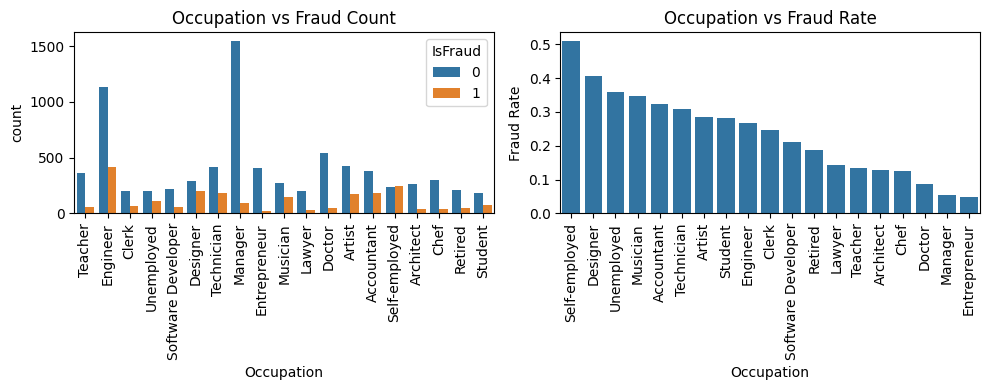

Analyzing: MaritalStatus


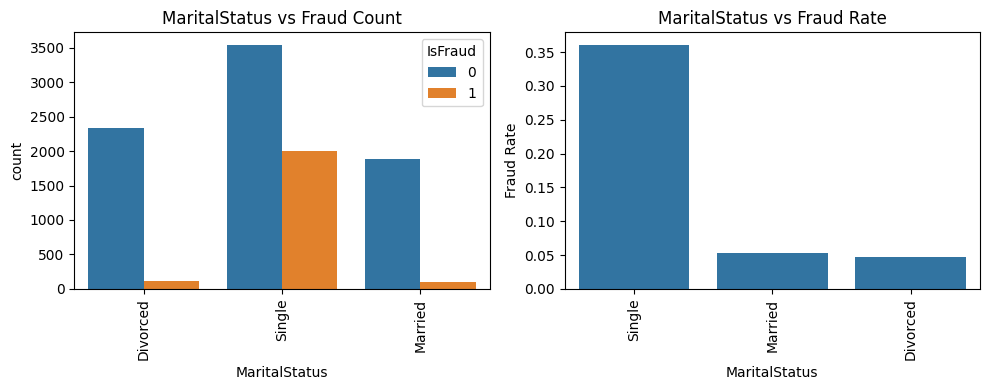

Analyzing: ResidentialStatus


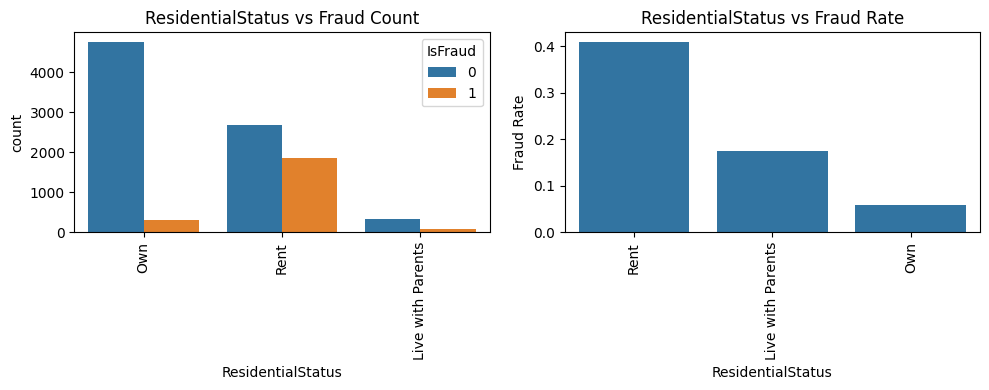

Analyzing: PurposeoftheLoan


Analyzing: Collateral


Analyzing: ApplicationBehavior


Analyzing: LocationofApplication


Analyzing: ChangeinBehavior


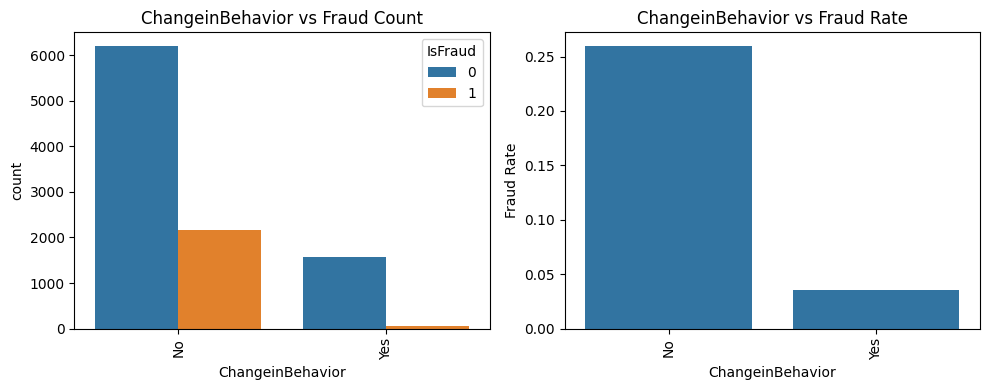

Analyzing: TimeofTransaction


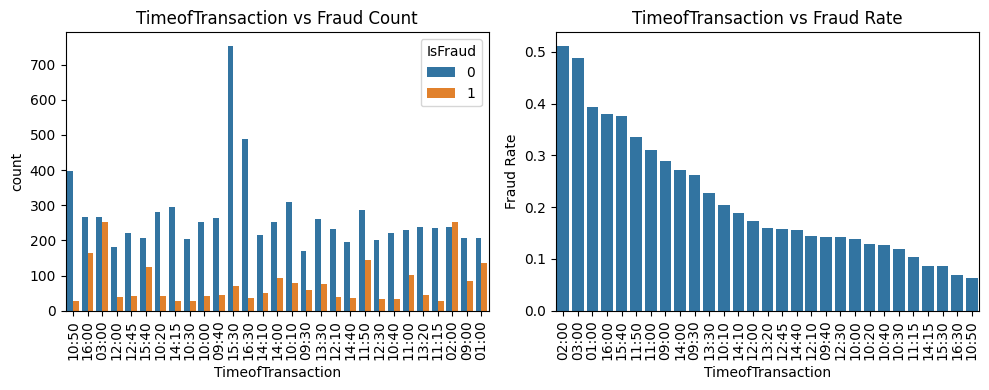

Analyzing: AccountActivity


Analyzing: PaymentBehavior


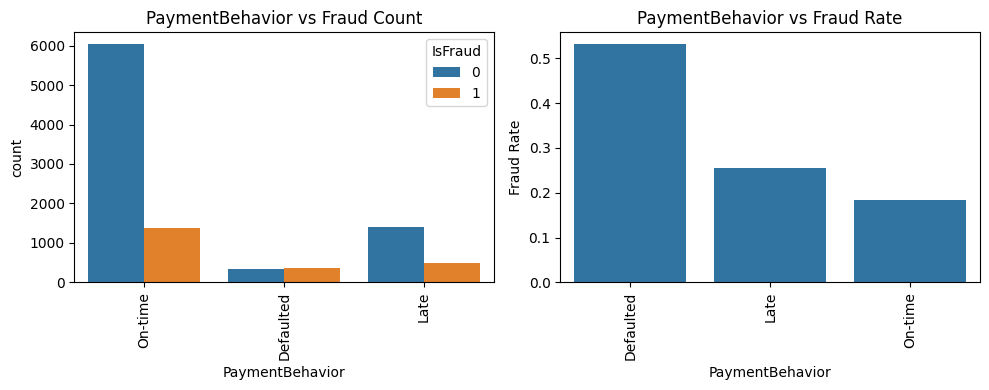

Analyzing: Blacklists


Analyzing: EmploymentVerification


Analyzing: PastFinancialMalpractices


Analyzing: DeviceInformation


Analyzing: SocialMediaFootprint


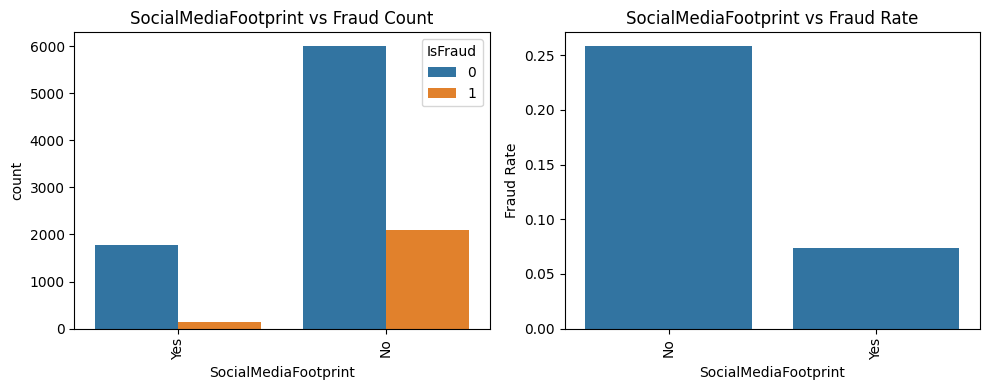

Analyzing: ConsistencyinData


Analyzing: Referral


Analyzing: IsFraud


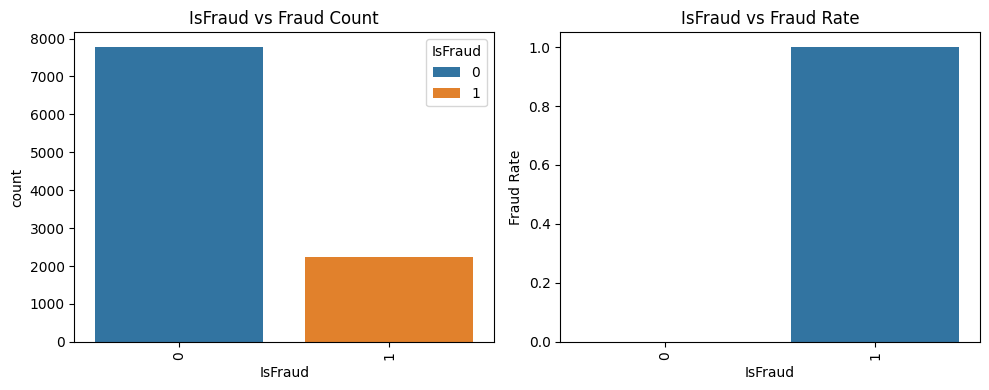

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Occupation', 'MaritalStatus', 'ResidentialStatus', 'PurposeoftheLoan', 'Collateral', 'ApplicationBehavior', 'LocationofApplication', 'ChangeinBehavior', 'TimeofTransaction', 'AccountActivity', 'PaymentBehavior', 'Blacklists', 'EmploymentVerification', 'PastFinancialMalpractices', 'DeviceInformation', 'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud']


# M√∂vcud olmayan s√ºtunlar varsa atmaq √º√ß√ºn
categorical_cols = [col for col in categorical_cols if col in df.columns]

# Funksiya: countplot v…ô fraud nisb…ôt barplot
def plot_fraud_relation(df, col):
    plt.figure(figsize=(10, 4))
    # Countplot (say √ºzr…ô)
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=col, hue='IsFraud')
    plt.xticks(rotation=90)
    plt.title(f'{col} vs Fraud Count')

    # Fraud rate barplot
    plt.subplot(1, 2, 2)
    fraud_rate = df.groupby(col)['IsFraud'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs Fraud Rate')
    plt.ylabel("Fraud Rate")

    plt.tight_layout()
    plt.show()

# B√ºt√ºn kateqorik d…ôyi≈ü…ônl…ôr √º√ß√ºn t…ôtbiq et
for col in categorical_cols:
    print(f"Analyzing: {col}")
    if df[col].nunique() <= 50:  # 50-d…ôn √ßox unikal d…ôy…ôri olanlarƒ± ke√ßm…ôk √º√ß√ºn
        plot_fraud_relation(df, col)
    else:
        print(f"Skipped '{col}' due to high cardinality ({df[col].nunique()} unique values)\n")


Sayƒ±sal D…ôyi≈ü…ônl…ôrin Histogramlarƒ±

Fayda	                           T…ôsviri
üìà Daƒüƒ±lƒ±mƒ± anlamaq	             M…ôlumat normaldƒ±rmƒ±, yoxsa pozulub?
üö® Aykƒ±rƒ± d…ôy…ôrl…ôri g√∂rm…ôk	     Fƒ±rƒ±ldaq√ßƒ±lƒ±q v…ô ya s…ôhv daxil edilmi≈ü d…ôy…ôrl…ôri tapmaq
üîß Feature transformation planlamaq	Log d√∂n√º≈üt√ºrm…ô, normalizasiya, standardization
üîç Data cleaning q…ôrarlarƒ±	     Null d…ôy…ôrl…ôrd…ôn …ôvv…ôl veril…ôri anlamaq

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayƒ±sal s√ºtunlarƒ± se√ß
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'IsFraud' in numerical_columns:
    numerical_columns.remove('IsFraud')

# Histograms
df[numerical_columns].hist(bins=30, figsize=(18, 12), layout=(int(len(numerical_columns)/3)+1, 3))
plt.suptitle("Sayƒ±sal D…ôyi≈ü…ônl…ôrin Histogramlarƒ±", fontsize=16)
plt.tight_layout()
plt.show()

Numeric s√ºtunlar il…ô boxplot (fraud statusuna g√∂r…ô)

Sual	Boxplot il…ô cavabƒ±
Fƒ±rƒ±ldaq√ßƒ±lƒ±qda m…ôbl…ôƒül…ôr f…ôrqlidirmi?	B…ôli ‚Üí Boxplotdan g√∂r√ºr√ºk
Outlier-lar hansƒ±lardƒ±r?	K…ônarda olan n√∂qt…ôl…ôr
Daƒüƒ±lƒ±m simmetrikdirmi?	Qutunun m…ôrk…ôzi v…ô quyruqlarƒ±na baxƒ±lƒ±r
H…ôr iki sinifd…ô (IsFraud=0/1) f…ôrq varmƒ±?	Qutularƒ±n yeri v…ô uzunluƒüu m√ºqayis…ô edilir

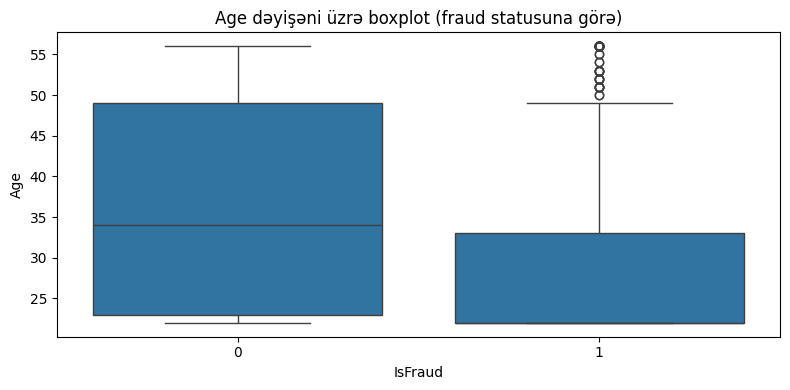

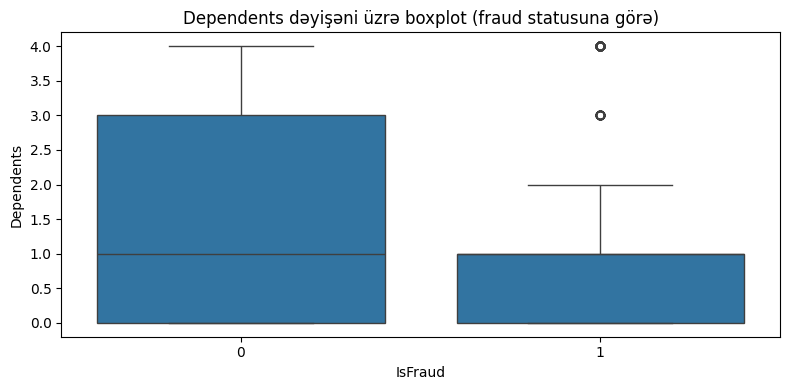

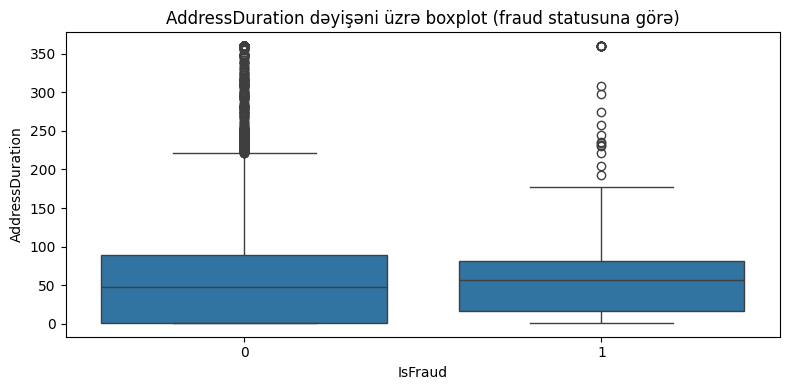

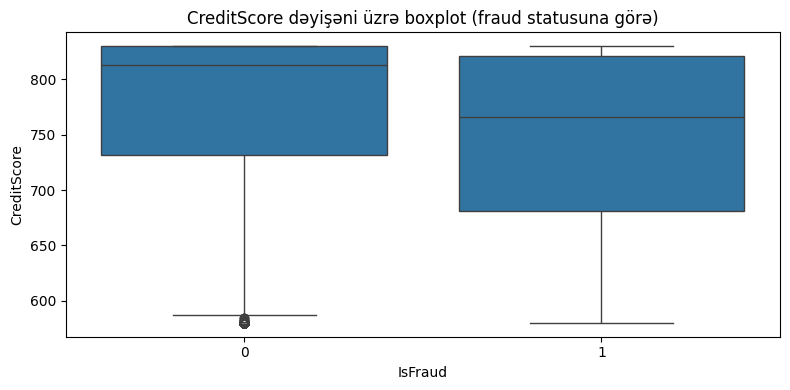

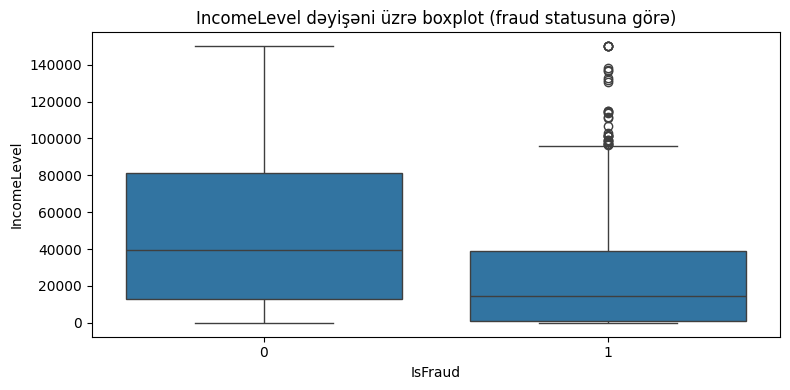

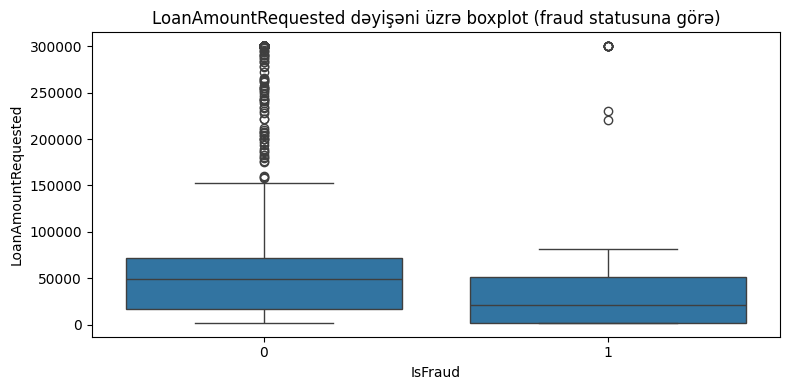

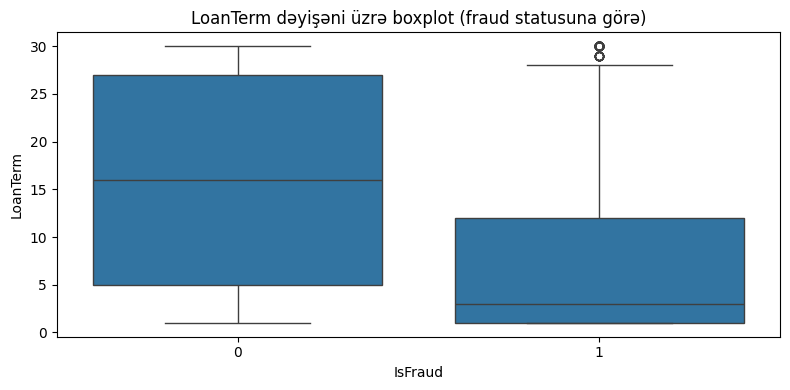

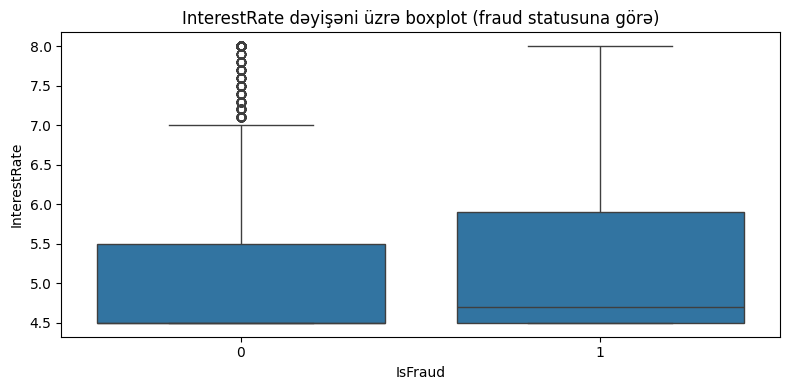

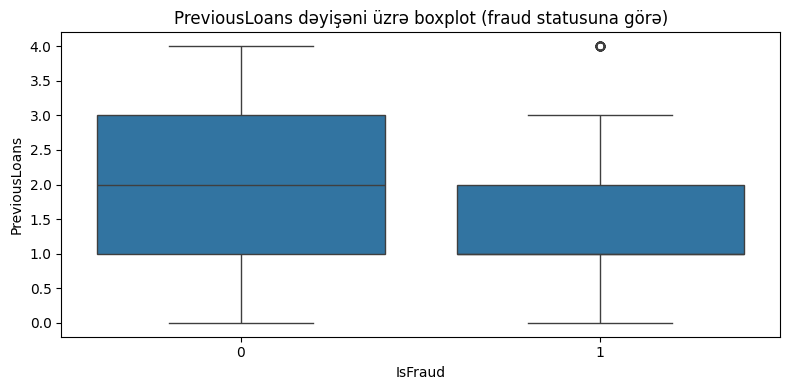

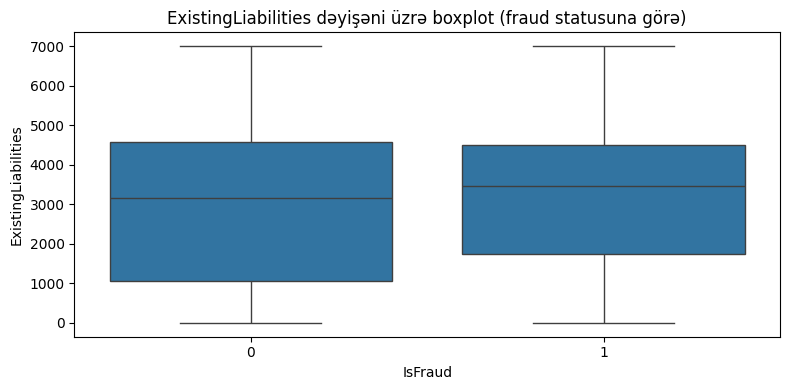

In [ ]:
# Boxplotlar - h…ôd…ôf d…ôyi≈ü…ôn…ô g√∂r…ô (Is_Fraud)
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='IsFraud', y=col, data=df)
    plt.title(f"{col} d…ôyi≈ü…ôni √ºzr…ô boxplot (fraud statusuna g√∂r…ô)")
    plt.tight_layout()
    plt.show()

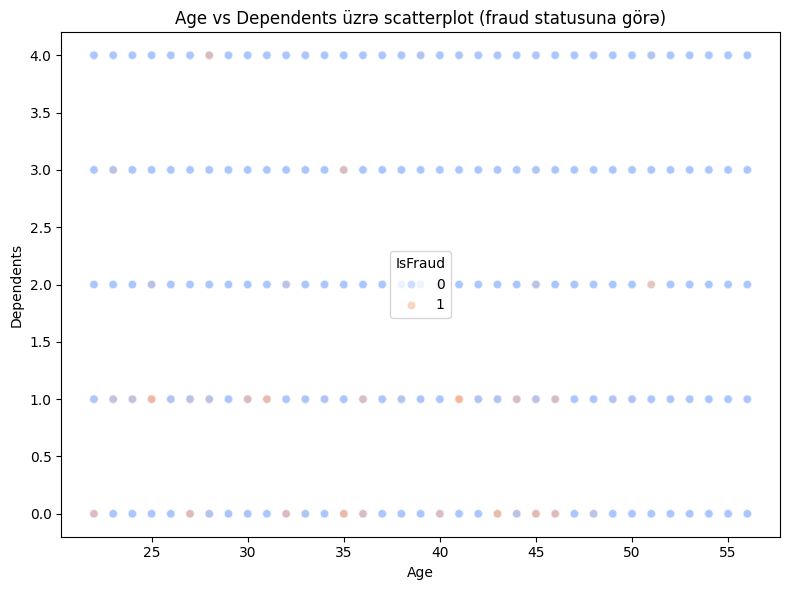

In [ ]:
# ƒ∞lk iki sayƒ±sal d…ôyi≈ü…ôn √º√ß√ºn scatterplot (…ôg…ôr varsa)
if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=numerical_columns[0], y=numerical_columns[1], hue='IsFraud', palette='coolwarm', alpha=0.6)
    plt.title(f"{numerical_columns[0]} vs {numerical_columns[1]} √ºzr…ô scatterplot (fraud statusuna g√∂r…ô)")
    plt.tight_layout()
    plt.show()

Korelyasiya Matriksi (Sayƒ±sal D…ôyi≈ü…ônl…ôr)

H…ôd…ôf d…ôyi≈ü…ônl…ô (‚ÄúFraud‚Äù) g√ºcl√º korrelyasiyada olan d…ôyi≈ü…ônl…ôr model…ô daxil edil…ô bil…ôr.

Az v…ô ya sƒ±fƒ±ra yaxƒ±n korrelyasiya olan d…ôyi≈ü…ônl…ôr is…ô b…ôz…ôn √∂n…ômsiz ola bil…ôr.

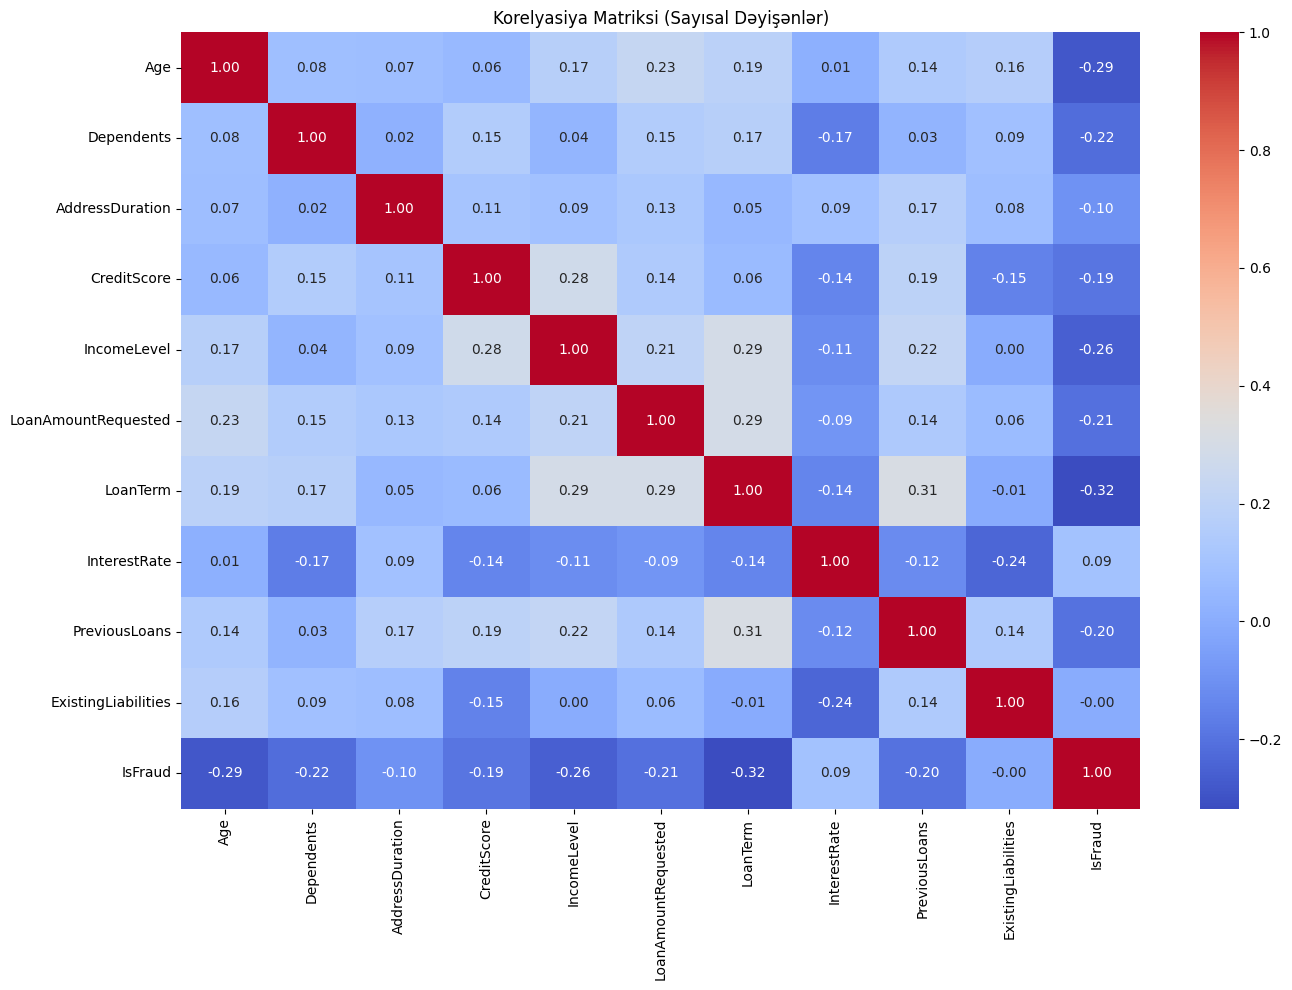

In [ ]:
# Korelyasiya matriksi
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_columns + ['IsFraud']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelyasiya Matriksi (Sayƒ±sal D…ôyi≈ü…ônl…ôr)")
plt.tight_layout()
plt.show()

Inbalance Check

In [ ]:
import plotly.express as px
labels=["Genuine","Fraud"]

fraud_or_not = df["IsFraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['IsFraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

1. Target d…ôyi≈ü…ônin (Is_Fraud) paylanmasƒ±

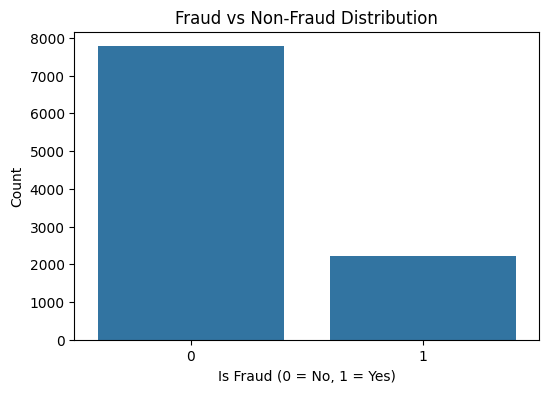

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='IsFraud')
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Countplot ‚Äî H…ôr card tipinde fraud v…ô non-fraud …ôm…ôliyyatlarƒ±n sayƒ±nƒ± g√∂st…ôrir

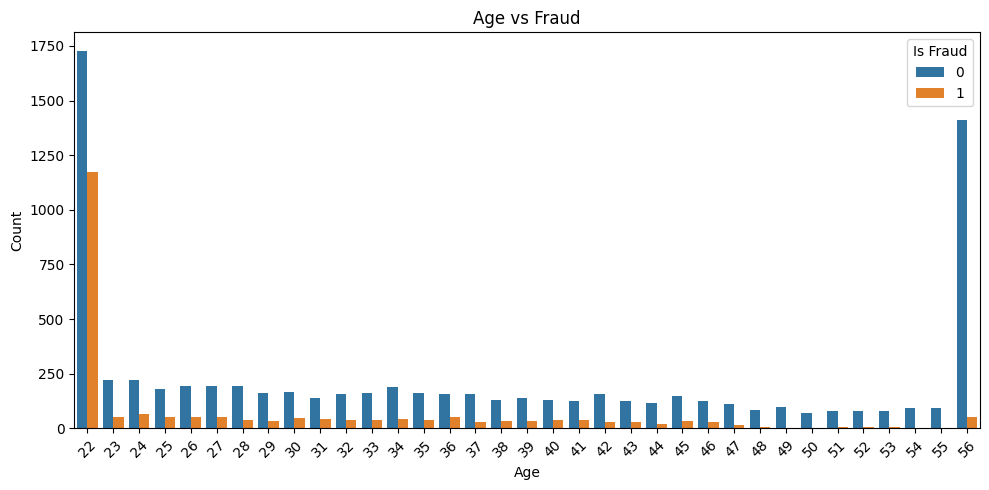

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Age', hue='IsFraud')
plt.title("Age vs Fraud")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

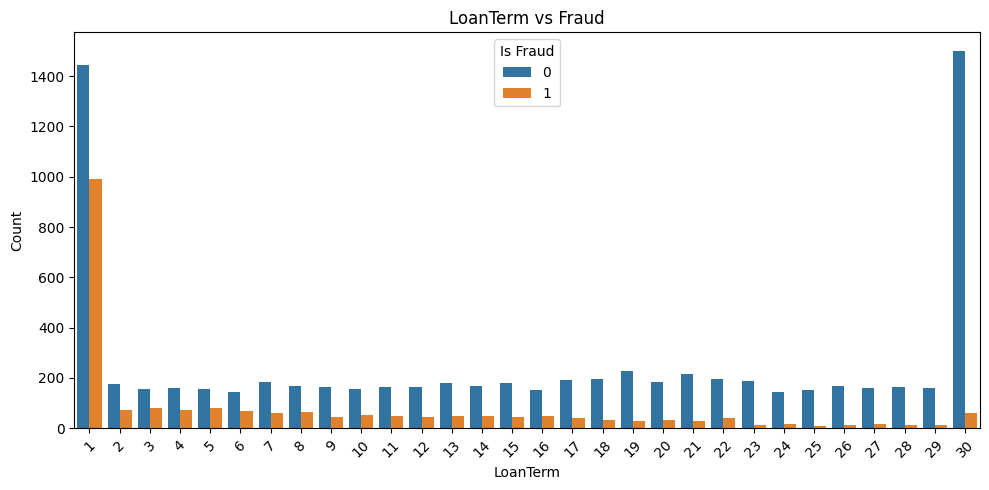

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='LoanTerm', hue='IsFraud')
plt.title("LoanTerm vs Fraud")
plt.xlabel("LoanTerm")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

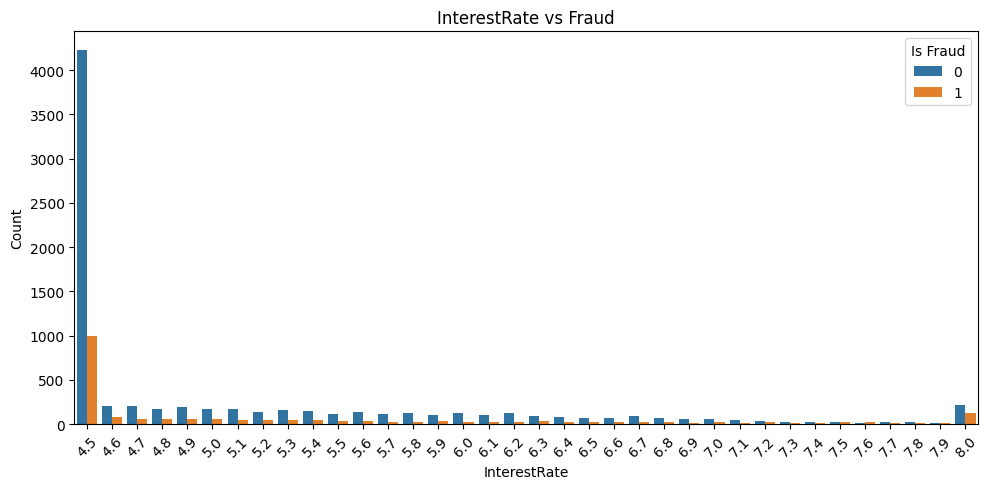

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='InterestRate', hue='IsFraud')
plt.title("InterestRate vs Fraud")
plt.xlabel("InterestRate")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

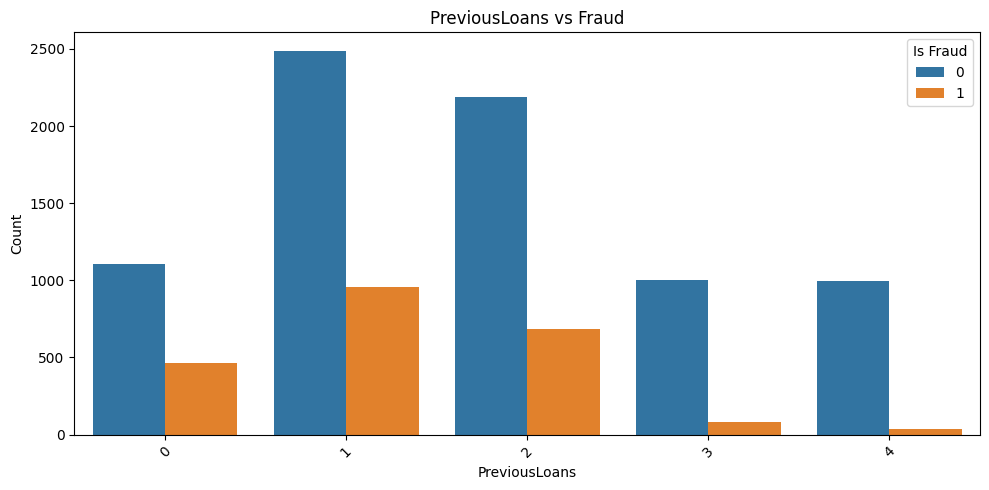

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PreviousLoans', hue='IsFraud')
plt.title("PreviousLoans vs Fraud")
plt.xlabel("PreviousLoans")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Is Fraud")
plt.tight_layout()
plt.show()

Sayƒ±sal d…ôyi≈ü…ônl…ôrin paylanmasƒ± (Histogram)

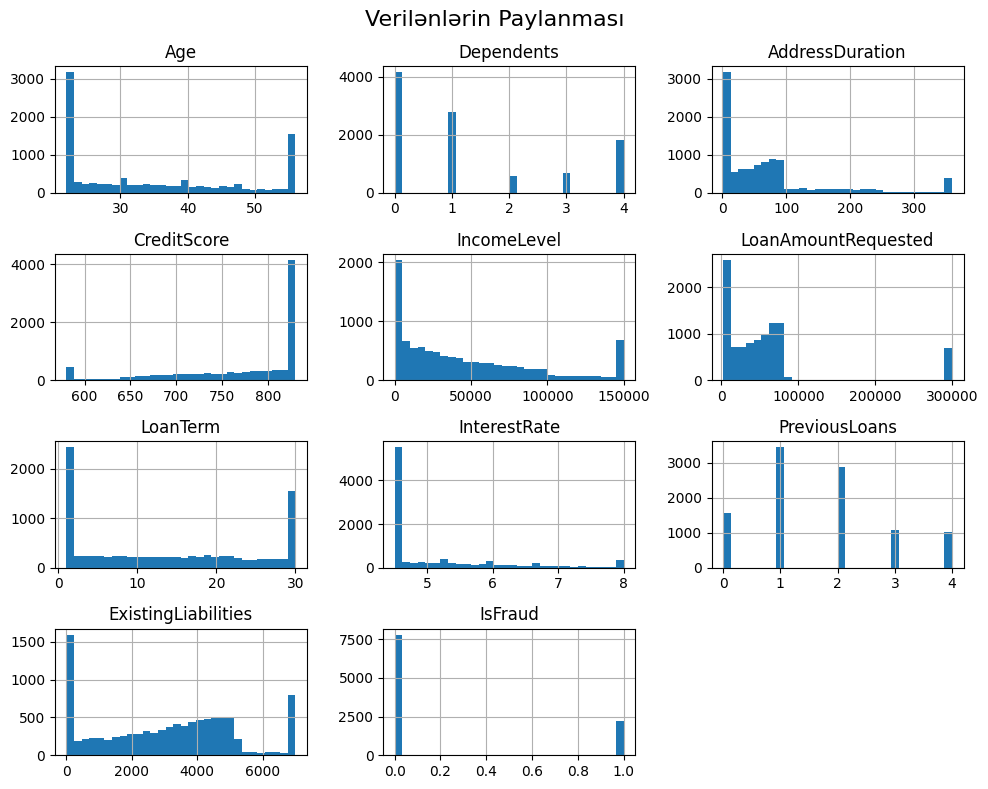

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(10, 8))

plt.suptitle('Veril…ônl…ôrin Paylanmasƒ±', fontsize=16)

plt.xlabel('D…ôy…ôrl…ôr', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

What is the average amount of customers in the dataset ?

In [ ]:
# average_amount = df['amount'].mean()
# print("Average amount:", average_amount)

What is the most common Merchant_Category ?

In [ ]:
# most_common_item = df['Merchant_Category'].mode()[0]
# print("Most Common Merchant_Category:", most_common_item)

What is the most common payment method used by customers ?

In [ ]:
# most_common_payment_method = df['Transaction_Type'].mode()[0]
# print("Most Common Payment Method:", most_common_payment_method)

What is the average purchase amount for customers with Fraud Transactions of 'Yes' and 'No' ?

In [ ]:
# avg_purchase_subscription_yes = df[df['is_fraudulent'] == 1]['amount'].mean()
# avg_purchase_subscription_no = df[df['is_fraudulent'] == 0]['amount'].mean()
# print("Average Fraud Transaction Amount:", avg_purchase_subscription_yes)
# print("Average Non-Fraud Transaction Amount:", avg_purchase_subscription_no)

What is the most common day for transactions ?

In [ ]:
# most_common_season = df['transaction_time'].mode()[0]
# print("Most Common day for transactions:", most_common_season)

# 5. DATA CLEANING

Bo≈ü (NaN) d…ôy…ôrl…ôrin idar…ô olunmasƒ± (silinm…ôsi, doldurulmasƒ±).

Dublikatlarƒ±n t…ômizl…ônm…ôsi.

Uyƒüunsuz v…ô s…ôhv m…ôlumatlarƒ±n d√ºz…ôldilm…ôsi.

Qeyri-d…ôqiq, anormal v…ô √ßƒ±xƒ±ntƒ±lƒ± (outlier) d…ôy…ôrl…ôrin m√º…ôyy…ônl…ô≈üdirilm…ôsi v…ô idar…ô edilm…ôsi.

Formatlarƒ±n standartla≈üdƒ±rƒ±lmasƒ± (tarix formatlarƒ±, kateqorik etiketl…ôr v…ô s.).

Bo≈ü d…ôy…ôrl…ôrin yoxlanmasƒ±

In [ ]:
# H…ôr bir s√ºtunda ne√ß…ô bo≈ü (NaN) d…ôy…ôr var
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Bo≈ü d…ôy…ôrl…ôr:\n", missing_values)


Bo≈ü d…ôy…ôrl…ôr:
 Series([], dtype: int64)


Dublikatlarƒ±n A≈ükarlanmasƒ± v…ô T…ômizl…ônm…ôsi

In [ ]:
# Datasetd…ô ne√ß…ô dublikat s…ôtrin olduƒüunu yoxla
duplicate_rows = df.duplicated()
print(f"Tapƒ±lan dublikat s…ôtr sayƒ±: {duplicate_rows.sum()}")

# Dublikatlarƒ± sil
df.drop_duplicates(inplace=True)
print(f"Dublikatlar silindikd…ôn sonra dataset √∂l√ß√ºs√º: {df.shape}")


Tapƒ±lan dublikat s…ôtr sayƒ±: 0
Dublikatlar silindikd…ôn sonra dataset √∂l√ß√ºs√º: (10000, 29)


In [ ]:
df.head()

Age          Occupation MaritalStatus  Dependents  ResidentialStatus  \
0   56             Teacher      Divorced           4                Own   
1   40            Engineer        Single           0               Rent   
2   25               Clerk       Married           0  Live with Parents   
3   34          Unemployed        Single           0               Rent   
4   47  Software Developer        Single           0               Rent   

   AddressDuration  CreditScore  IncomeLevel  LoanAmountRequested  LoanTerm  \
0                1          827        52033               300000        25   
1                1          830        42893                 8105         3   
2              360          809       141233                75734        19   
3               92          630         9217                 2000         1   
4               26          733        47979                67767         1   

   ... AccountActivity PaymentBehavior  Blacklists  EmploymentVerification  \
0  ...          Normal         On-time          No                Verified   
1  ...          Normal         On-time          No                Verified   
2  ...          Normal         On-time         Yes                Verified   
3  ...         Unusual       Defaulted          No            Not Verified   
4  ...          Normal         On-time          No                Verified   

   PastFinancialMalpractices DeviceInformation SocialMediaFootprint  \
0                         No            Tablet                  Yes   
1                         No            Laptop                   No   
2                         No            Laptop                   No   
3                        Yes            Mobile                   No   
4                         No            Laptop                   No   

  ConsistencyinData  Referral IsFraud  
0        Consistent  Referral       0  
1        Consistent    Online       0  
2        Consistent  Referral       0  
3      Inconsistent    Online       1  
4        Consistent    Online       0  

[5 rows x 29 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

Uyƒüunsuz v…ô s…ôhv m…ôlumatlarƒ±n d√ºz…ôldilm…ôsi.

In [ ]:
df['IncomeLevel'].value_counts()

IncomeLevel
0         1179
150000     630
1833         4
9368         3
506          3
          ... 
13375        1
127142       1
33776        1
51310        1
42222        1
Name: count, Length: 7813, dtype: int64

In [ ]:
# G…ôlir aralƒ±qlarƒ± v…ô etiketl…ôr
bins = [0, 1000, 2000, 4000, 6000, 9000, 15000, float('inf')]
labels = [
    'Very Low income',
    'Low income',
    'Lower-middle income',
    'Middle income',
    'Upper-middle income',
    'High income',
    'Very High income'
]

# Qrupla≈üdƒ±rƒ±lmƒ±≈ü income s√ºtunu …ôlav…ô et
df['IncomeLevel'] = pd.cut(df['IncomeLevel'], bins=bins, labels=labels, right=False)


In [ ]:
df['CreditScore'].value_counts()

CreditScore
830    3768
580     428
818      58
825      56
821      54
       ... 
607       2
601       2
585       2
633       2
586       1
Name: count, Length: 250, dtype: int64

In [ ]:
# Kredit skorunun aralƒ±ƒüƒ± v…ô etiketl…ôri
credit_bins = [300, 500, 580, 670, 740, 800, float('inf')]
credit_labels = ['Very Poor', 'Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Yeni s√ºtun …ôlav…ô ed…ôk
df['CreditScore'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels, right=False)


In [ ]:
df['LoanAmountRequested'].value_counts()

LoanAmountRequested
2000      1972
300000     686
64676        3
66841        3
81321        3
          ... 
29118        1
5836         1
14717        1
55986        1
62838        1
Name: count, Length: 7043, dtype: int64

In [ ]:
# Loan amount √º√ß√ºn bin v…ô etiketl…ôr
loan_bins = [0, 1000, 5000, 10000, 20000, 50000, float('inf')]
loan_labels = [
    'Micro loan',
    'Small loan',
    'Medium loan',
    'Large loan',
    'Very large loan',
    'High-value loan'
]

# Yeni s√ºtun …ôlav…ô et
df['LoanAmountRequested'] = pd.cut(df['LoanAmountRequested'], bins=loan_bins, labels=loan_labels, right=False)


In [ ]:
df['ExistingLiabilities'].value_counts()

ExistingLiabilities
0       1417
7000     766
4041       8
4831       8
4624       7
        ... 
1155       1
186        1
1590       1
4008       1
2818       1
Name: count, Length: 4138, dtype: int64

Bu s√ºtunda d…ôy…ôr √ßox olduƒüu √º√ß√ºn d…ôy…ôrl…ôr m√º…ôyy…ôn kateqoriyalara salƒ±nƒ±r.

In [ ]:
liability_bins = [0, 1000, 5000, 10000, 20000, float('inf')]
liability_labels = [
    'No/Low debt',
    'Moderate debt',
    'Significant debt',
    'High debt',
    'Critical debt'
]

# Yeni s√ºtun …ôlav…ô et
df['ExistingLiabilities'] = pd.cut(df['ExistingLiabilities'], bins=liability_bins, labels=liability_labels, right=False)

h…ôr s√ºtun √º√ß√ºn unikal d…ôy…ôrl…ôr v…ô onlarƒ±n sayƒ±

In [ ]:
object_cols = df.select_dtypes(include='object').columns
# H…ôr biri √º√ß√ºn unikal d…ôy…ôrl…ôri g√∂st…ôr
for col in object_cols:
    print(f"\nüìå S√ºtun: {col}")
    print(df[col].value_counts(dropna=False))


üìå S√ºtun: Occupation
Occupation
Manager               1638
Engineer              1546
Technician             597
Artist                 595
Doctor                 591
Accountant             558
Designer               488
Self-employed          473
Entrepreneur           427
Teacher                421
Musician               419
Chef                   338
Unemployed             318
Architect              298
Software Developer     279
Clerk                  263
Retired                261
Student                259
Lawyer                 231
Name: count, dtype: int64

üìå S√ºtun: MaritalStatus
MaritalStatus
Single      5551
Divorced    2457
Married     1992
Name: count, dtype: int64

üìå S√ºtun: ResidentialStatus
ResidentialStatus
Own                  5057
Rent                 4528
Live with Parents     415
Name: count, dtype: int64

üìå S√ºtun: PurposeoftheLoan
PurposeoftheLoan
home         3463
auto         2221
personal     1999
education    1164
travel        579
medical       

R…ôq…ômsal (sayƒ±sal) s√ºtunlarƒ±n se√ßilm…ôsi

In [ ]:
# Sayƒ±sal s√ºtunlarƒ± se√ßirik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove("IsFraud")  # h…ôd…ôf s√ºtunu √ßƒ±xarƒ±rƒ±q
print("Sayƒ±sal s√ºtunlar:", numeric_cols)


Sayƒ±sal s√ºtunlar: ['Age', 'Dependents', 'AddressDuration', 'LoanTerm', 'InterestRate', 'PreviousLoans']


Boxplot il…ô √ßƒ±xƒ±ntƒ±larƒ±n vizual analizi

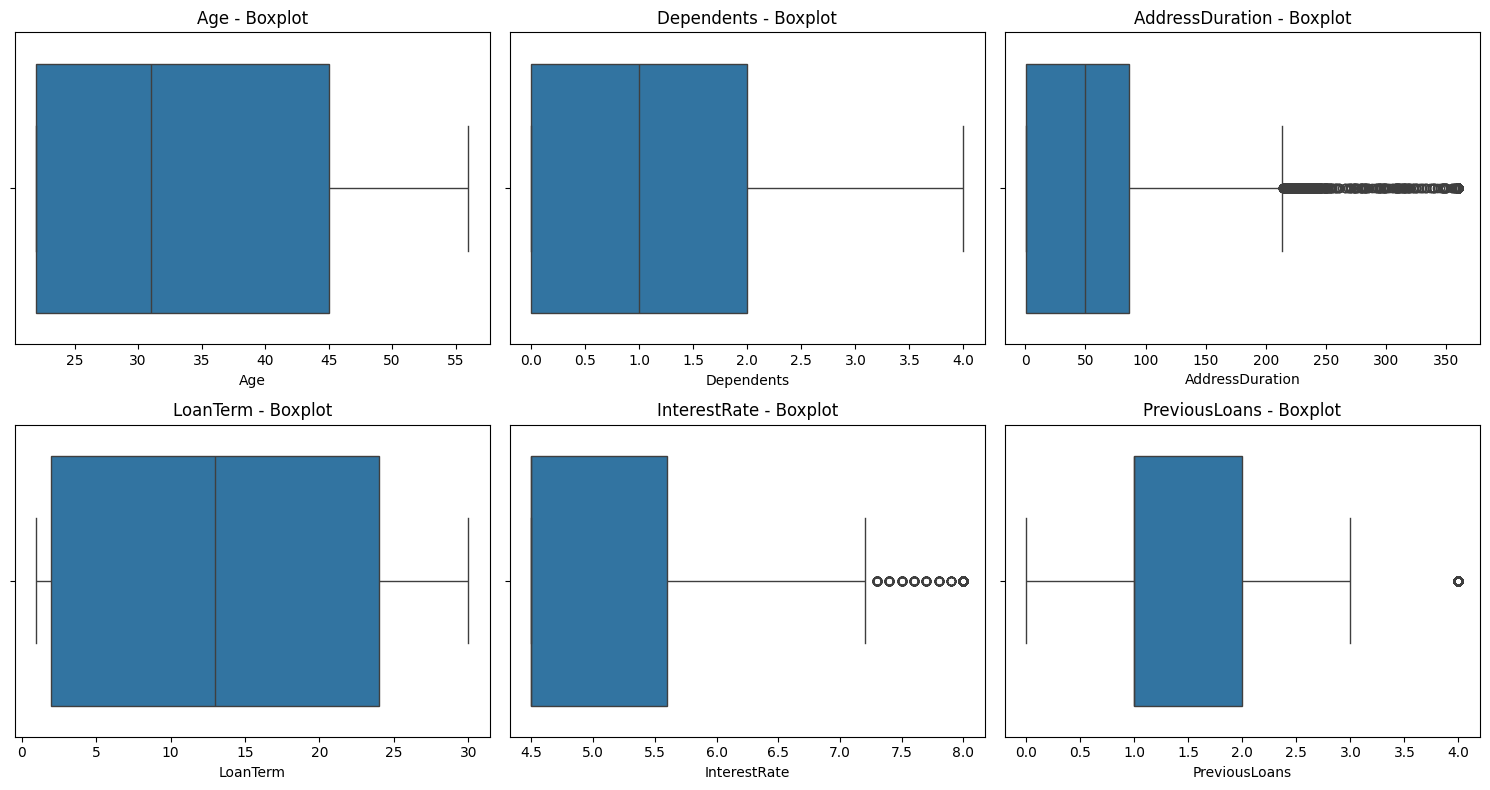

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6]):  # ilk 6 s√ºtunu g√∂st…ôririk (vizual √º√ß√ºn kifay…ôtdir)
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot")
plt.tight_layout()
plt.show()

IQR metoduna …ôsas…ôn outlier-l…ôrin silinm…ôsi

In [ ]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower) | (data[col] > upper)]
        print(f"{col} s√ºtununda {len(outliers)} √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.")
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

# Outlier-l…ôri t…ômizl…ôyirik
df_cleaned = remove_outliers_iqr(df.copy(), numeric_cols)
print(f"T…ômizl…ônmi≈ü data √∂l√ß√ºs√º: {df_cleaned.shape}")


Age s√ºtununda 0 √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.
Dependents s√ºtununda 0 √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.
AddressDuration s√ºtununda 793 √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.
LoanTerm s√ºtununda 0 √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.
InterestRate s√ºtununda 674 √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.
PreviousLoans s√ºtununda 851 √ßƒ±xƒ±ntƒ± d…ôy…ôr tapƒ±ldƒ±.
T…ômizl…ônmi≈ü data √∂l√ß√ºs√º: (7682, 29)


Tarix Formatlarƒ±nƒ±n Standartla≈üdƒ±rƒ±lmasƒ±

In [ ]:
# Tarix formatƒ±na √ßevir v…ô s…ôhvl…ôri NaT kimi saxla
df['TimeofTransaction'] = pd.to_datetime(df['TimeofTransaction'], errors='coerce', dayfirst=True)

# t…ôkc…ô saatƒ± almaq
df['transaction_hour'] = df['TimeofTransaction'].dt.hour

# 6. FEATURE ENGINEERING

Yeni d…ôyi≈ü…ônl…ôrin yaradƒ±lmasƒ± (m…ôs…ôl…ôn, tarixd…ôn ay v…ô ya h…ôft…ô g√ºn√º √ßƒ±xarmaq).

Kategorik d…ôyi≈ü…ônl…ôrin kodla≈üdƒ±rƒ±lmasƒ± (OneHotEncoder, LabelEncoder).

Sayƒ±sal d…ôyi≈ü…ônl…ôrin miqyaslanmasƒ± v…ô ya normalla≈üdƒ±rƒ±lmasƒ± (StandardScaler, MinMaxScaler).

Lazƒ±msƒ±z d…ôyi≈ü…ônl…ôrin √ßƒ±xarƒ±lmasƒ± (feature selection).

M…ôlumatƒ±n model √º√ß√ºn uyƒüun hala g…ôtirilm…ôsi.

Lazƒ±m olmayan s√ºtunlarƒ±n silinm…ôsi bunu EDA hiss…ôsind…ô Target sutunumuzla …ôlaq…ô …ôsasƒ±nda t…ôsirin…ô v…ô biz…ô datanƒ±n lazƒ±mlƒ±lƒ±ƒüƒ±na g√∂r…ô q…ôrar veririk

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Age                        10000 non-null  int64         
 1   Occupation                 10000 non-null  object        
 2   MaritalStatus              10000 non-null  object        
 3   Dependents                 10000 non-null  int64         
 4   ResidentialStatus          10000 non-null  object        
 5   AddressDuration            10000 non-null  int64         
 6   CreditScore                10000 non-null  category      
 7   IncomeLevel                10000 non-null  category      
 8   LoanAmountRequested        10000 non-null  category      
 9   LoanTerm                   10000 non-null  int64         
 10  PurposeoftheLoan           10000 non-null  object        
 11  Collateral                 10000 non-null  object        
 12  Inter

Silin…ôn s√ºtunlar target s√ºtunumuz √º√ß√ºn …ôh…ômiyy…ôti olmayan model…ô t…ôsir etm…ôy…ôn s√ºtunlardƒ±r.∆èlav…ô olaraq silin…ôn s√ºtunlar is…ô √ße≈üidlilik √ßoxdursa  v…ô encoding etm…ôk m…ôqs…ôd…ô uyƒüun deyils…ôd…ô yen…ô silinir

In [ ]:
# Silm…ôk ist…ôdiyiniz s√ºtunlarƒ±n siyahƒ±sƒ±
columns_to_drop = ['Dependents', 'ResidentialStatus', 'AddressDuration','ChangeinBehavior', 'TimeofTransaction', 'LocationofApplication', 'Referral',]

# S√ºtunlarƒ± silm…ôk
df = df.drop(columns=columns_to_drop)

**Kategorik d…ôyi≈ü…ônl…ôrin kodla≈üdƒ±rƒ±lmasƒ±**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        10000 non-null  int64   
 1   Occupation                 10000 non-null  object  
 2   MaritalStatus              10000 non-null  object  
 3   CreditScore                10000 non-null  category
 4   IncomeLevel                10000 non-null  category
 5   LoanAmountRequested        10000 non-null  category
 6   LoanTerm                   10000 non-null  int64   
 7   PurposeoftheLoan           10000 non-null  object  
 8   Collateral                 10000 non-null  object  
 9   InterestRate               10000 non-null  float64 
 10  PreviousLoans              10000 non-null  int64   
 11  ExistingLiabilities        10000 non-null  category
 12  ApplicationBehavior        10000 non-null  object  
 13  AccountActivity            10000

Age s√ºtunu m√º…ôyy…ôn ya≈ü aralƒ±ƒüƒ± olaraq kateqoriyalandƒ±rƒ±lƒ±r.

In [ ]:
# def categorize_age(Age):
#    if 18 <= Age < 40:
#         return 'Young Adult'
#    elif 40 <= Age < 60:
#         return 'Middle-Aged'
#    else:
#         return 'Senior'

# df['Age_Category'] = df['Age'].apply(categorize_age)

In [ ]:
# df = df.drop('Age', axis=1)
# df.info()

In [ ]:
# df['Age_Category'].value_counts()

In [ ]:
# # siralam problemi yasamayaq deye one hot encoding
# # One-Hot Encoding etm…ôk
# df = pd.get_dummies(df, columns=['Age_Category'], drop_first=True)

In [ ]:
# # Category tipindeki s√ºtunlarƒ± alƒ±n
# category_columns = df.select_dtypes(include=['category']).columns.tolist()

# # Object tipindeki s√ºtunlarƒ± alƒ±n
# object_columns = df.select_dtypes(include=['object']).columns.tolist()

# # butun categorik ve object s√ºtunlar i√ßin One-Hot Encoding :
# df = pd.get_dummies(df, columns=object_columns + category_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in cat_cols:
    freq_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_map)


In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    freq_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(freq_map)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# B√ºt√ºn category s√ºtunlarƒ±nƒ± se√ß
cat_cols = df.select_dtypes(include='category').columns

# H…ôr biri √º√ß√ºn Label Encoding (yenid…ôn s√ºtun yaratmadan)
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  int64  
 2   MaritalStatus              10000 non-null  int64  
 3   CreditScore                10000 non-null  int64  
 4   IncomeLevel                10000 non-null  int64  
 5   LoanAmountRequested        10000 non-null  int64  
 6   LoanTerm                   10000 non-null  int64  
 7   PurposeoftheLoan           10000 non-null  int64  
 8   Collateral                 10000 non-null  int64  
 9   InterestRate               10000 non-null  float64
 10  PreviousLoans              10000 non-null  int64  
 11  ExistingLiabilities        10000 non-null  int64  
 12  ApplicationBehavior        10000 non-null  int64  
 13  AccountActivity            10000 non-null  int6

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col != 'IsFraud']


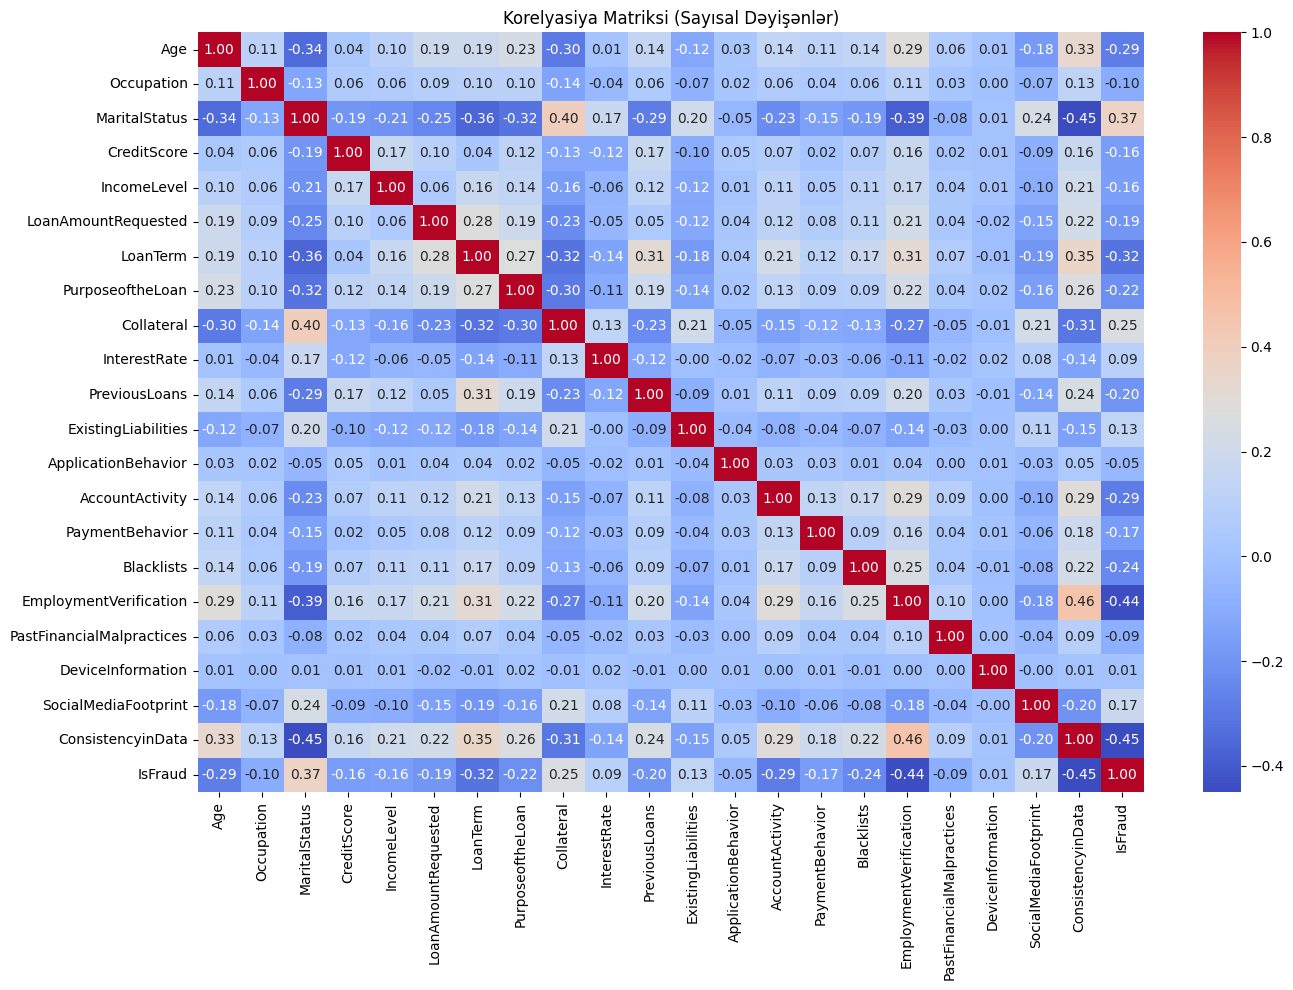

In [ ]:
# Korelyasiya matriksi
plt.figure(figsize=(14, 10))
corr_matrix = df[numerical_columns + ['IsFraud']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelyasiya Matriksi (Sayƒ±sal D…ôyi≈ü…ônl…ôr)")
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  int64  
 2   MaritalStatus              10000 non-null  int64  
 3   CreditScore                10000 non-null  int64  
 4   IncomeLevel                10000 non-null  int64  
 5   LoanAmountRequested        10000 non-null  int64  
 6   LoanTerm                   10000 non-null  int64  
 7   PurposeoftheLoan           10000 non-null  int64  
 8   Collateral                 10000 non-null  int64  
 9   InterestRate               10000 non-null  float64
 10  PreviousLoans              10000 non-null  int64  
 11  ExistingLiabilities        10000 non-null  int64  
 12  ApplicationBehavior        10000 non-null  int64  
 13  AccountActivity            10000 non-null  int6

In [ ]:
# Silm…ôk ist…ôdiyiniz s√ºtunlarƒ±n siyahƒ±sƒ±
columns_to_drop = ['Age','IncomeLevel', 'CreditScore','ExistingLiabilities','Occupation', 'LoanTerm','PurposeoftheLoan', 'PreviousLoans', 'ApplicationBehavior', 'AccountActivity','PaymentBehavior','Blacklists','EmploymentVerification','PastFinancialMalpractices','ConsistencyinData','transaction_hour',]

# S√ºtunlarƒ± silm…ôk
df = df.drop(columns=columns_to_drop)

**Sayƒ±sal d…ôyi≈ü…ônl…ôrin miqyaslanmasƒ± v…ô ya normalla≈üdƒ±rƒ±lmasƒ± (StandardScaler, MinMaxScaler).**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sayƒ±sal s√ºtunlarƒ± se√ß (target s√ºtunu xaric)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('IsFraud')  # Target s√ºtunu √ßƒ±xarƒ±rƒ±q

StandardScaler il…ô miqyaslama (z-score normalizasiya):

In [ ]:
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 7. DATA SPLITTING , MODEL SELECTION,MODEL TRAINING,MODEL EVALUATION

Dataset train v…ô test (b…ôz…ôn validation) olaraq b√∂l√ºn√ºr (train_test_split).

Modelin √∂yr…ônm…ôsi √º√ß√ºn v…ô sonradan test √º√ß√ºn ayrƒ±lƒ±r.

Ad…ôt…ôn, 70-30%, 80-20% nisb…ôtind…ô olur.

Layih…ô m…ôqs…ôdin…ô uyƒüun algoritml…ôr se√ßilir (m…ôs…ôl…ôn, Regression, Classification, Clustering).

Bir ne√ß…ô model sƒ±nanacaqsa, ilkin se√ßiml…ôr edilir.

Model train datasƒ± √ºz…ôrind…ô √∂yr…ôdilir (fit metodu).

H…ôr model √º√ß√ºn parametrl…ôr t…ôyin edil…ô bil…ôr.

Modelin performansƒ± test datasƒ± √ºz…ôrind…ô √∂l√ß√ºl√ºr.

M√ºvafiq qiym…ôtl…ôndirm…ô metrikl…ôri hesablanƒ±r:

Regression √º√ß√ºn: RMSE, MAE, R¬≤

Classification √º√ß√ºn: Accuracy, Precision, Recall, F1-score, ROC-AUC

N…ôtic…ôl…ôr analiz edilir, modelin z…ôif t…ôr…ôfl…ôri ara≈üdƒ±rƒ±lƒ±r.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MaritalStatus         10000 non-null  float64
 1   LoanAmountRequested   10000 non-null  float64
 2   Collateral            10000 non-null  float64
 3   InterestRate          10000 non-null  float64
 4   DeviceInformation     10000 non-null  float64
 5   SocialMediaFootprint  10000 non-null  float64
 6   IsFraud               10000 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


# **Burada bir ne√ß…ô modeli yoxlayƒ±rƒ±q …ôn yax≈üƒ± n…ôtic…ô ver…ôni tapmaq √º√ß√ºn.**

In [ ]:
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 8. Standartla≈üdƒ±rma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model siyahƒ±sƒ± (yenil…ônmi≈ü versiya):
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Artƒ±q SMOTE istifad…ô etmirik
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        auc = roc_auc_score(y_test, proba)
        print(f"ROC AUC Score: {auc:.4f}")




===== Logistic Regression =====
              precision    recall  f1-score   support

           0     0.7820    0.9756    0.8681      1555
           1     0.3667    0.0494    0.0871       445

    accuracy                         0.7695      2000
   macro avg     0.5743    0.5125    0.4776      2000
weighted avg     0.6896    0.7695    0.6943      2000

ROC AUC Score: 0.7715

===== Random Forest =====
              precision    recall  f1-score   support

           0     0.8455    0.8797    0.8623      1555
           1     0.5105    0.4382    0.4716       445

    accuracy                         0.7815      2000
   macro avg     0.6780    0.6590    0.6669      2000
weighted avg     0.7709    0.7815    0.7753      2000

ROC AUC Score: 0.7710

===== XGBoost =====
              precision    recall  f1-score   support

           0     0.8473    0.8849    0.8657      1555
           1     0.5239    0.4427    0.4799       445

    accuracy                         0.7865      2000
   

**Data target s√ºtunu inbalace olduƒüu √º√ß√ºn bir ne√ß…ô oversampling metodu yoxlayƒ±rƒ±q.**



### üîÑ Over Sampling Method: SMOTE ###

===== üìä Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9342    0.6212    0.7462      1555
           1     0.3903    0.8472    0.5344       445

    accuracy                         0.6715      2000
   macro avg     0.6623    0.7342    0.6403      2000
weighted avg     0.8132    0.6715    0.6991      2000

ROC AUC Score: 0.7716



===== üìä Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.8899    0.7588    0.8192      1555
           1     0.4436    0.6719    0.5344       445

    accuracy                         0.7395      2000
   macro avg     0.6668    0.7154    0.6768      2000
weighted avg     0.7906    0.7395    0.7558      2000

ROC AUC Score: 0.7661



===== üìä Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9002    0.7543    0.8209      1555
           1     0.4519    0.7079    0.5517       445

    accuracy                         0.7440      2000
   macro avg     0.6761    0.7311    0.6863      2000
weighted avg     0.8005    0.7440    0.7610      2000

ROC AUC Score: 0.7920


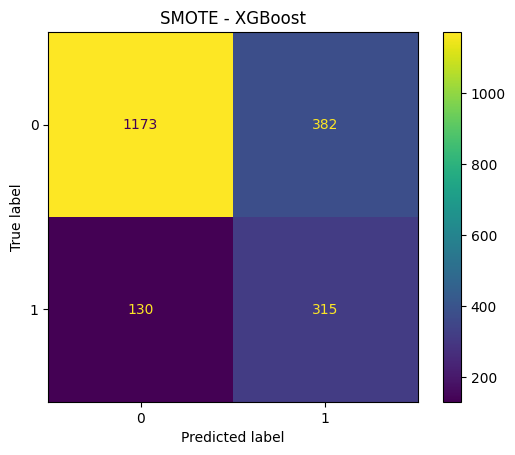


===== üìä Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8838    0.7730    0.8247      1555
           1     0.4484    0.6449    0.5290       445

    accuracy                         0.7445      2000
   macro avg     0.6661    0.7090    0.6769      2000
weighted avg     0.7870    0.7445    0.7589      2000

ROC AUC Score: 0.7444



===== üìä Model: KNN =====
              precision    recall  f1-score   support

           0     0.8568    0.8039    0.8295      1555
           1     0.4362    0.5303    0.4787       445

    accuracy                         0.7430      2000
   macro avg     0.6465    0.6671    0.6541      2000
weighted avg     0.7632    0.7430    0.7514      2000

ROC AUC Score: 0.7432


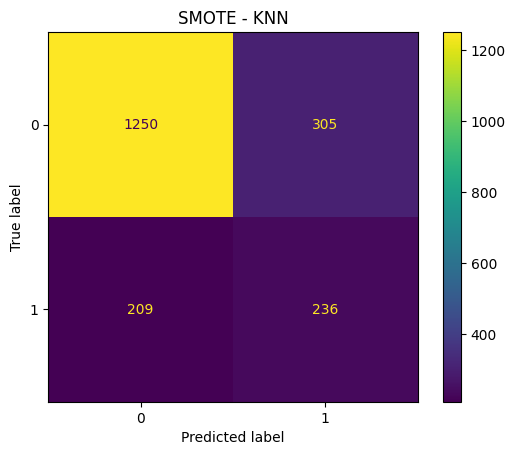



### üîÑ Over Sampling Method: ADASYN ###

===== üìä Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9394    0.5981    0.7308      1555
           1     0.3812    0.8652    0.5292       445

    accuracy                         0.6575      2000
   macro avg     0.6603    0.7316    0.6300      2000
weighted avg     0.8152    0.6575    0.6860      2000

ROC AUC Score: 0.7701


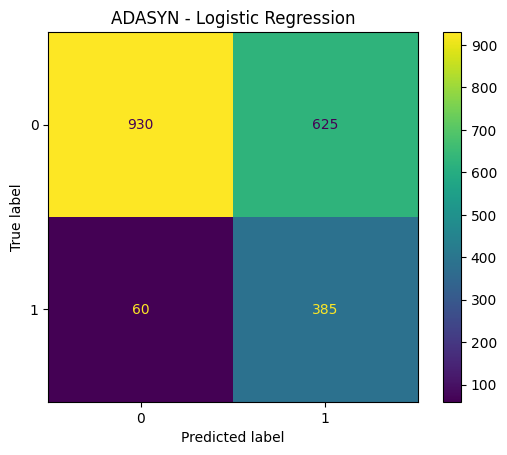


===== üìä Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.8923    0.6823    0.7733      1555
           1     0.3909    0.7124    0.5048       445

    accuracy                         0.6890      2000
   macro avg     0.6416    0.6973    0.6391      2000
weighted avg     0.7808    0.6890    0.7136      2000

ROC AUC Score: 0.7612


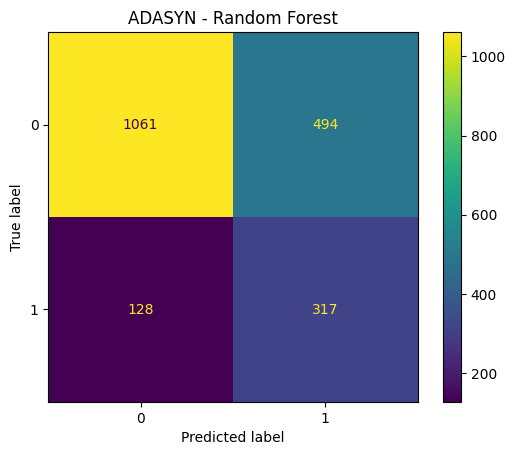


===== üìä Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9091    0.7010    0.7916      1555
           1     0.4195    0.7551    0.5393       445

    accuracy                         0.7130      2000
   macro avg     0.6643    0.7280    0.6655      2000
weighted avg     0.8002    0.7130    0.7355      2000

ROC AUC Score: 0.7911


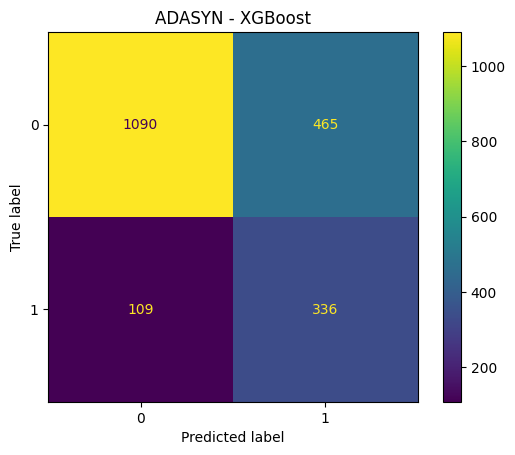


===== üìä Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8881    0.6990    0.7823      1555
           1     0.3969    0.6921    0.5045       445

    accuracy                         0.6975      2000
   macro avg     0.6425    0.6956    0.6434      2000
weighted avg     0.7788    0.6975    0.7205      2000

ROC AUC Score: 0.7373


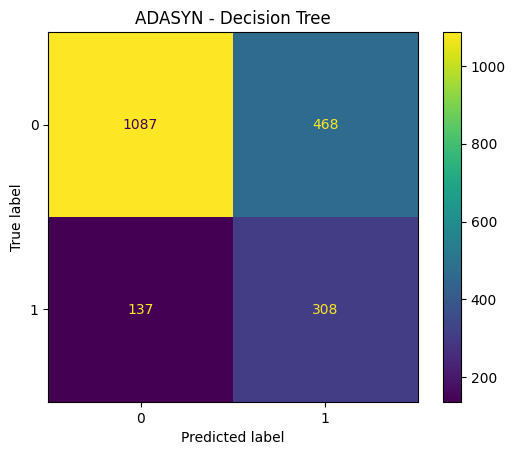


===== üìä Model: KNN =====
              precision    recall  f1-score   support

           0     0.8582    0.7865    0.8208      1555
           1     0.4226    0.5461    0.4765       445

    accuracy                         0.7330      2000
   macro avg     0.6404    0.6663    0.6486      2000
weighted avg     0.7613    0.7330    0.7442      2000

ROC AUC Score: 0.7427




### üîÑ Over Sampling Method: Borderline-SMOTE ###

===== üìä Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9371    0.6032    0.7340      1555
           1     0.3824    0.8584    0.5291       445

    accuracy                         0.6600      2000
   macro avg     0.6597    0.7308    0.6315      2000
weighted avg     0.8136    0.6600    0.6884      2000

ROC AUC Score: 0.7729


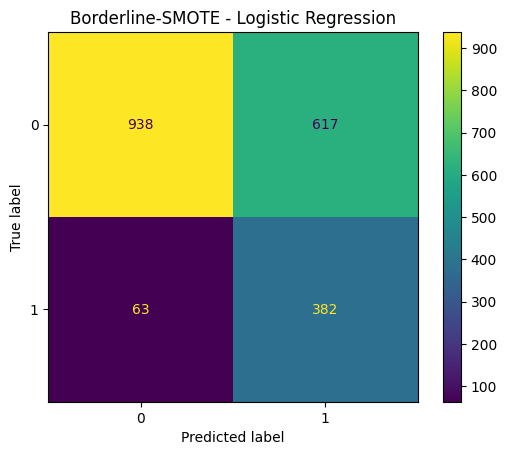


===== üìä Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.8708    0.7280    0.7930      1555
           1     0.3957    0.6225    0.4838       445

    accuracy                         0.7045      2000
   macro avg     0.6332    0.6752    0.6384      2000
weighted avg     0.7651    0.7045    0.7242      2000

ROC AUC Score: 0.7441



===== üìä Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9031    0.6952    0.7856      1555
           1     0.4097    0.7393    0.5272       445

    accuracy                         0.7050      2000
   macro avg     0.6564    0.7173    0.6564      2000
weighted avg     0.7933    0.7050    0.7281      2000

ROC AUC Score: 0.7760


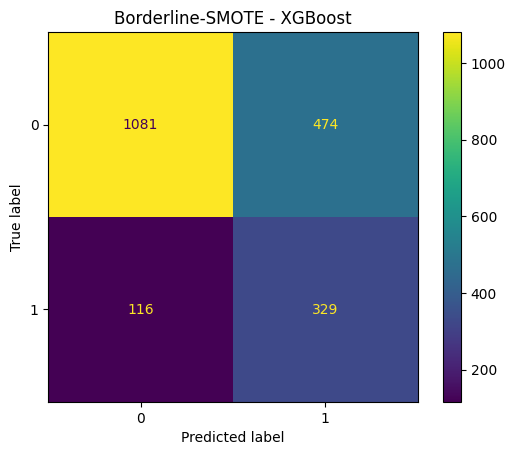


===== üìä Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.8637    0.7376    0.7957      1555
           1     0.3929    0.5933    0.4727       445

    accuracy                         0.7055      2000
   macro avg     0.6283    0.6654    0.6342      2000
weighted avg     0.7589    0.7055    0.7238      2000

ROC AUC Score: 0.7167



===== üìä Model: KNN =====
              precision    recall  f1-score   support

           0     0.8598    0.8045    0.8312      1555
           1     0.4422    0.5416    0.4869       445

    accuracy                         0.7460      2000
   macro avg     0.6510    0.6730    0.6590      2000
weighted avg     0.7669    0.7460    0.7546      2000

ROC AUC Score: 0.7517




### üîÑ Over Sampling Method: RandomOverSampler ###

===== üìä Model: Logistic Regression =====
              precision    recall  f1-score   support

           0     0.9328    0.6244    0.7481      1555
           1     0.3910    0.8427    0.5342       445

    accuracy                         0.6730      2000
   macro avg     0.6619    0.7336    0.6411      2000
weighted avg     0.8122    0.6730    0.7005      2000

ROC AUC Score: 0.7716



===== üìä Model: Random Forest =====
              precision    recall  f1-score   support

           0     0.9030    0.7068    0.7929      1555
           1     0.4176    0.7348    0.5326       445

    accuracy                         0.7130      2000
   macro avg     0.6603    0.7208    0.6628      2000
weighted avg     0.7950    0.7130    0.7350      2000

ROC AUC Score: 0.7663



===== üìä Model: XGBoost =====
              precision    recall  f1-score   support

           0     0.9108    0.7093    0.7975      1555
           1     0.4271    0.7573    0.5462       445

    accuracy                         0.7200      2000
   macro avg     0.6690    0.7333    0.6719      2000
weighted avg     0.8032    0.7200    0.7416      2000

ROC AUC Score: 0.7866


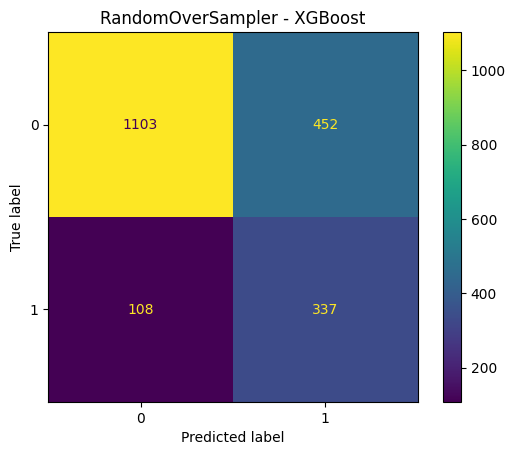


===== üìä Model: Decision Tree =====
              precision    recall  f1-score   support

           0     0.9035    0.7106    0.7955      1555
           1     0.4208    0.7348    0.5352       445

    accuracy                         0.7160      2000
   macro avg     0.6622    0.7227    0.6654      2000
weighted avg     0.7961    0.7160    0.7376      2000

ROC AUC Score: 0.7442


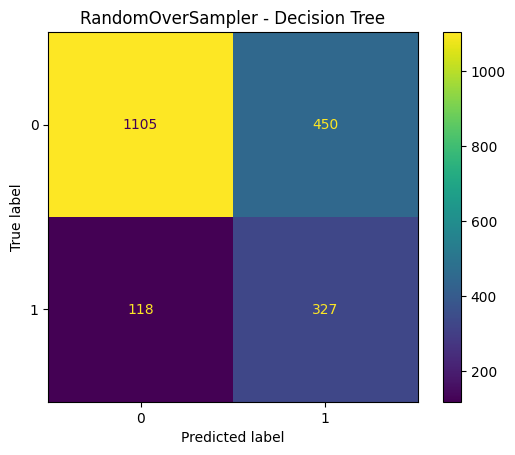


===== üìä Model: KNN =====
              precision    recall  f1-score   support

           0     0.8592    0.7968    0.8268      1555
           1     0.4337    0.5438    0.4826       445

    accuracy                         0.7405      2000
   macro avg     0.6465    0.6703    0.6547      2000
weighted avg     0.7645    0.7405    0.7502      2000

ROC AUC Score: 0.7307


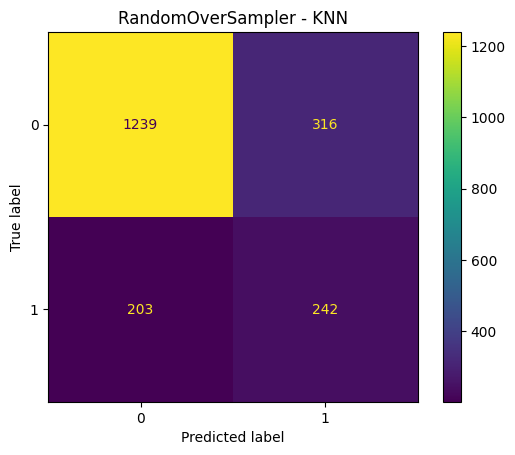

In [ ]:
# G…ôr…ôkli kitabxanalar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
import matplotlib.pyplot as plt

# 1. X v…ô y ayƒ±r
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Standartla≈üdƒ±rma
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Over Sampling metodlarƒ±
oversamplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Borderline-SMOTE": BorderlineSMOTE(random_state=42),
    "RandomOverSampler": RandomOverSampler(random_state=42)
}

# 5. Modell…ôr
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# 6. H…ôr sampling metodunu sƒ±namaq
for over_name, oversampler in oversamplers.items():
    print(f"\n\n### üîÑ Over Sampling Method: {over_name} ###")

    # Apply oversampling
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)
        preds = model.predict(X_test)
        proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        print(f"\n===== üìä Model: {model_name} =====")
        print(classification_report(y_test, preds, digits=4))
        if proba is not None:
            auc = roc_auc_score(y_test, proba)
            print(f"ROC AUC Score: {auc:.4f}")

        # Confusion Matrix
        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"{over_name} - {model_name}")
        plt.show()



**ƒ∞nbalans D√ºz…ôli≈üi √º√ß√ºn Undersampler etdik**

In [ ]:

# 1. Target v…ô Features
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 2. Undersampling t…ôtbiq et
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 3. Train-test b√∂lm…ôsi
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 4. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. XGBoost √º√ß√ºn class ratio yenid…ôn hesablanƒ±r (balanslƒ± olduqdan sonra ehtiyac qalmaya bil…ôr, amma …ôlav…ô ed…ô bil…ôrik)
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# 6. Modell…ôr
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                              scale_pos_weight=scale_pos_weight, random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier()
}

# 7. Modell…ôri √∂yr…ôt v…ô qiym…ôtl…ôndir
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        auc = roc_auc_score(y_test, proba)
        print(f"ROC AUC Score: {auc:.4f}")



===== Logistic Regression =====
              precision    recall  f1-score   support

           0     0.8304    0.6368    0.7208       446
           1     0.7049    0.8697    0.7787       445

    accuracy                         0.7531       891
   macro avg     0.7677    0.7532    0.7497       891
weighted avg     0.7677    0.7531    0.7497       891

ROC AUC Score: 0.8109

===== Random Forest =====
              precision    recall  f1-score   support

           0     0.7431    0.6614    0.6999       446
           1     0.6943    0.7708    0.7306       445

    accuracy                         0.7160       891
   macro avg     0.7187    0.7161    0.7152       891
weighted avg     0.7187    0.7160    0.7152       891

ROC AUC Score: 0.7863

===== XGBoost =====
              precision    recall  f1-score   support

           0     0.7443    0.6592    0.6992       446
           1     0.6935    0.7730    0.7311       445

    accuracy                         0.7160       891
   

Artƒ±q bu yuxarƒ±daki kodda random forest modleind…ô daha yax≈üƒ±  n…ôtic…ô aldƒ±ƒüƒ±mƒ±zƒ± g√∂r√ºr√ºk.

Neural Network Modeli

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
import pandas as pd
# 3. Train-test b√∂lm…ôsi
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. StandardScaler il…ô miqyaslandƒ±rma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Neural Network modeli
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.AUC(curve='PR')])

# 6. Modelin √∂yr…ôdilm…ôsi
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    verbose=1)

# 7. Qiym…ôtl…ôndirm…ô
y_pred_probs = model.predict(X_test_scaled).ravel()
avg_precision = average_precision_score(y_test, y_pred_probs)

print(f"Average Precision Score (PR AUC): {avg_precision:.4f}")


Epoch 1/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 5ms/step - auc: 0.2517 - loss: 0.5541 - val_auc: 0.4773 - val_loss: 0.4390
Epoch 2/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - auc: 0.4917 - loss: 0.4222 - val_auc: 0.4830 - val_loss: 0.4238
Epoch 3/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - auc: 0.5010 - loss: 0.4110 - val_auc: 0.4858 - val_loss: 0.4205
Epoch 4/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - auc: 0.5034 - loss: 0.4081 - val_auc: 0.4873 - val_loss: 0.4187
Epoch 5/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - auc: 0.5085 - loss: 0.4063 - val_auc: 0.4885 - val_loss: 0.4175
Epoch 6/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - auc: 0.5106 - loss: 0.4050 - val_auc: 0.4884 - val_loss: 0.4166
Epoch 7/50
250/250 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

**Bir ne√ß…ô modeli yoxladƒ±q v…ô sonda bu q…ôrar g…ôldikki : xgb boost v…ô Undersampling edilmis yax≈üƒ± n…ôtic…ô verir**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Target v…ô feature-lar
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Random Forest modeli (imbalans d√ºz…ôli≈üi il…ô)
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# 4. Modeli √∂yr…ôt v…ô qiym…ôtl…ôndir
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
proba = rf_model.predict_proba(X_test)[:, 1]

# N…ôtic…ôl…ôrin √ßapƒ±
print("===== Random Forest =====")
print(classification_report(y_test, preds, digits=4))
auc = roc_auc_score(y_test, proba)
print(f"ROC AUC Score: {auc:.4f}")


===== Random Forest =====
              precision    recall  f1-score   support

           0     0.9048    0.7215    0.8029      1555
           1     0.4303    0.7348    0.5427       445

    accuracy                         0.7245      2000
   macro avg     0.6676    0.7282    0.6728      2000
weighted avg     0.7992    0.7245    0.7450      2000

ROC AUC Score: 0.7715


under sampling logistic regression

In [ ]:
# 1. Target v…ô Features
X = df.drop('IsFraud', axis=1)
y = df['IsFraud']

# 2. Undersampling t…ôtbiq et
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# 3. Train-test b√∂lm…ôsi
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# 4. Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# 6. Modell…ôr
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
}

# 7. Modell…ôri √∂yr…ôt v…ô qiym…ôtl…ôndir
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        auc = roc_auc_score(y_test, proba)
        print(f"ROC AUC Score: {auc:.4f}")



===== Logistic Regression =====
              precision    recall  f1-score   support

           0     0.8304    0.6368    0.7208       446
           1     0.7049    0.8697    0.7787       445

    accuracy                         0.7531       891
   macro avg     0.7677    0.7532    0.7497       891
weighted avg     0.7677    0.7531    0.7497       891

ROC AUC Score: 0.8109


# 11. MODEL TUNING & HYPERPARAMETER OPTIMIZATION

Modelin parametrl…ôri d…ôyi≈üdiril…ôr…ôk (Grid Search, Random Search) …ôn yax≈üƒ± n…ôtic…ô tapƒ±lƒ±r.

Cross-validation il…ô modelin stabil v…ô √ºmumil…ô≈üdirilmi≈ü performansƒ± yoxlanƒ±lƒ±r.

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from scipy.stats import loguniform, randint
import numpy as np

 Modell…ôrin Grid/Random Search konfiqurasiyalarƒ±

Logistic Regression (Randomized Search)

In [ ]:
logreg_params = {
    'C': loguniform(1e-3, 1e2),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # L1 √º√ß√ºn uyƒüundur
    'class_weight': ['balanced']
}

logreg = RandomizedSearchCV(LogisticRegression(max_iter=1000),
                            logreg_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c98e6d26a10>,
                                        'class_weight': ['balanced'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=42, scoring='roc_auc')

Random Forest (Grid Search)

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  rf_params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

XGBoost (Randomized Search)

In [ ]:
xgb_params = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 5, 7],
    'learning_rate': loguniform(0.01, 0.3),
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [scale_pos_weight]
}

xgb = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                         xgb_params, n_iter=20, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)
xgb.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                   param_distributions={'colsample_bytree': [0.8, 1],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c98739c4110>,
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c98739ebc10>,
                                        'scale_pos_weight': [np.float64(0.9994385176866929)],
                                        'subsample': [0.8, 1]},
                   random_state=42, scoring='roc_auc')

Decision Tree (Grid Search)

In [ ]:
dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  dt_params, scoring='roc_auc', cv=5, n_jobs=-1)
dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='roc_auc')

KNN (Grid Search)

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = GridSearchCV(KNeighborsClassifier(),
                   knn_params, scoring='roc_auc', cv=5, n_jobs=-1)
knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

 B√ºt√ºn modell…ôrin n…ôtic…ôl…ôrini √ßap et

In [ ]:
models = {
    "Logistic Regression": logreg.best_estimator_,
    "Random Forest": rf.best_estimator_,
    "XGBoost": xgb.best_estimator_,
    "Decision Tree": dt.best_estimator_,
    "KNN": knn.best_estimator_
}

for name, model in models.items():
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n===== {name} =====")
    print("∆èn yax≈üƒ± parametrl…ôr:", model.get_params())
    print(classification_report(y_test, preds, digits=4))
    if proba is not None:
        print(f"ROC AUC Score: {roc_auc_score(y_test, proba):.4f}")



===== Logistic Regression =====
∆èn yax≈üƒ± parametrl…ôr: {'C': np.float64(0.19069966103000435), 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
              precision    recall  f1-score   support

           0     0.8304    0.6368    0.7208       446
           1     0.7049    0.8697    0.7787       445

    accuracy                         0.7531       891
   macro avg     0.7677    0.7532    0.7497       891
weighted avg     0.7677    0.7531    0.7497       891

ROC AUC Score: 0.8112

===== Random Forest =====
∆èn yax≈üƒ± parametrl…ôr: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_l

 Cross-validation il…ô stabilik yoxlamasƒ±

In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=5)
    print(f"{name} - CV ROC AUC: {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression - CV ROC AUC: 0.7863 (+/- 0.0075)
Random Forest - CV ROC AUC: 0.8145 (+/- 0.0105)
XGBoost - CV ROC AUC: 0.8249 (+/- 0.0085)
Decision Tree - CV ROC AUC: 0.7899 (+/- 0.0105)
KNN - CV ROC AUC: 0.7607 (+/- 0.0088)


# 12. FINAL MODEL & PREDICTION

Se√ßilmi≈ü v…ô optimalla≈üdƒ±rƒ±lmƒ±≈ü model il…ô yeni, g√∂r√ºnm…ômi≈ü veril…ônl…ôr…ô proqnoz verilir.

Proqnozlar saxlanƒ±lƒ±r v…ô ya biznes…ô t…ôqdim olunur.

1. ∆èn Yax≈üƒ± Modelin Se√ßilm…ôsi

In [ ]:
best_model = models["XGBoost"]  # v…ô ya …ôn yax≈üƒ± n…ôtic…ô ver…ôni


2. Yeni Veril…ôr…ô Proqnoz

In [ ]:
# # Yeni veril…ônl…ôri …ôvv…ôlc…ô …ôvv…ôlki preprocessing il…ô eyni formada hazƒ±rla
# new_data_scaled = scaler.transform(new_data)  # scaler …ôvv…ôl fit edilmi≈ü olmalƒ±dƒ±r

# # Proqnozlar
# predictions = best_model.predict(new_data_scaled)
# probabilities = best_model.predict_proba(new_data_scaled)[:, 1]  # ehtimallar

3. N…ôtic…ôl…ôrin Saxlanmasƒ±

In [ ]:
# # N…ôtic…ôl…ôri DataFrame ≈ü…ôklind…ô birl…ô≈üdir…ôk
# results = new_data.copy()
# results['IsFraud_Prediction'] = predictions
# results['Fraud_Probability'] = probabilities

# # Fayl ≈ü…ôklind…ô yadda saxla
# results.to_csv('fraud_predictions.csv', index=False)
# print("Proqnozlar 'fraud_predictions.csv' faylƒ±nda saxlanƒ±ldƒ±.")


# 13. MODEL DEPLOYMENT (∆èg…ôr layih…ô t…ôl…ôb edirs…ô)

Model real sistem…ô inteqrasiya edilir (web app, API, avtomatla≈üdƒ±rƒ±lmƒ±≈ü sistem v…ô s.).

Monitorinq v…ô yenil…ônm…ô planƒ± hazƒ±rlanƒ±r.

G…ôr…ôkli paketl…ôri y√ºkl…ô

In [ ]:
pip install fastapi uvicorn joblib pyngrok nest_asyncio

MODELƒ∞N YADDA SAXLANMASI (save)

In [ ]:
import joblib

# Modeli v…ô scaler-i yadda saxla
joblib.dump(best_model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

Model v…ô scaler y√ºkl…ô

In [ ]:
import joblib

# Model v…ô scaler-i y√ºkl…ôyirik
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")

In [ ]:
# from pyngrok import ngrok

# ngrok.kill()  # B√ºt√ºn aktiv tunell…ôri baƒülayƒ±r

Loan elave edilmis api

0% ‚Äì 40%	Fƒ±rƒ±ldaq√ßƒ±lƒ±q ehtimalƒ± a≈üaƒüƒ±dƒ±r ‚Üí sistem "normal" sayƒ±r
40% ‚Äì 70%	Risk var, amma tam …ômin deyil ‚Üí diqq…ôt t…ôl…ôb edir
70% ‚Äì 100%	G√ºcl√º ehtimalla fƒ±rƒ±ldaq√ßƒ±lƒ±q ‚Üí y√ºks…ôk x…ôb…ôrdarlƒ±q lazƒ±mdƒ±r

In [ ]:
# ==============================#
# 1. Lazƒ±mi paketl…ôri qura≈üdƒ±r #
# ==============================#
!pip install fastapi nest_asyncio pyngrok uvicorn joblib pandas

# =========================#
# 2. ƒ∞mport v…ô ayarlamalar #
# =========================#
import nest_asyncio
import uvicorn
from fastapi import FastAPI, Request, Form
from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates
import joblib
import pandas as pd
import os
from pyngrok import ngrok

nest_asyncio.apply()

# =====================#
# 3. HTML Faylƒ±nƒ± Yarat #
# =====================#
os.makedirs("templates", exist_ok=True)

with open("templates/index.html", "w") as f:
    f.write("""
<!DOCTYPE html>
<html lang="az">
<head>
    <meta charset="UTF-8">
    <title>Sahib Alizada Fraud Modeli</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0/dist/css/bootstrap.min.css" rel="stylesheet">
    <link href="https://fonts.googleapis.com/css2?family=Rubik:wght@400;700&display=swap" rel="stylesheet">
    <style>
        body {
            margin: 0;
            font-family: 'Rubik', sans-serif;
            background: linear-gradient(135deg, #e0f7fa, #ffffff);
            min-height: 100vh;
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 40px 20px;
        }
        .wrapper {
            background: rgba(255, 255, 255, 0.7);
            backdrop-filter: blur(15px);
            border-radius: 30px;
            box-shadow: 0 10px 35px rgba(0, 0, 0, 0.1);
            padding: 40px;
            max-width: 900px;
            width: 100%;
        }
        .header {
            background: linear-gradient(to right, #0d47a1, #1976d2);
            color: white;
            padding: 20px;
            border-radius: 20px;
            text-align: center;
            font-size: 28px;
            font-weight: 700;
            margin-bottom: 30px;
            box-shadow: 0 5px 15px rgba(13, 71, 161, 0.3);
        }
        .form-label {
            font-weight: 500;
            margin-top: 15px;
        }
        .btn-custom {
            margin-top: 30px;
            background-color: #1976d2;
            color: white;
            font-weight: bold;
            border-radius: 12px;
            padding: 12px;
            font-size: 16px;
        }
        .btn-custom:hover {
            background-color: #0d47a1;
        }
        .result-box {
            margin-top: 30px;
            padding: 15px;
            border-radius: 15px;
            font-size: 18px;
            text-align: center;
            animation: fadeIn 0.7s ease-in-out;
        }
        .result-success {
            background-color: #d4edda;
            color: #155724;
            border: 1px solid #c3e6cb;
        }
        .result-danger {
            background-color: #f8d7da;
            color: #721c24;
            border: 1px solid #f5c6cb;
        }
        @keyframes fadeIn {
            from { opacity: 0; transform: translateY(20px); }
            to { opacity: 1; transform: translateY(0); }
        }
        .toggle-dark {
            position: absolute;
            top: 20px;
            right: 20px;
            background-color: #333;
            color: white;
            border: none;
            padding: 10px 15px;
            border-radius: 10px;
            font-weight: bold;
            cursor: pointer;
        }
        body.dark {
            background: linear-gradient(135deg, #121212, #1e1e1e);
            color: white;
        }
        body.dark .wrapper {
            background: rgba(50, 50, 50, 0.8);
            color: white;
        }
        body.dark .header {
            background: linear-gradient(to right, #222, #444);
        }
        body.dark input, body.dark .form-control {
            background-color: #333;
            color: white;
            border-color: #555;
        }
        body.dark .btn-custom {
            background-color: #444;
            color: white;
        }
        body.dark .btn-custom:hover {
            background-color: #666;
        }
    </style>
</head>
<body>
    <button class="toggle-dark" onclick="toggleDarkMode()">üåô Dark Mode</button>
    <div class="wrapper">
        <div class="header">üíº Sahib Alizada Fraud Modeli</div>
        <form action="/predict" method="post">
            <div class="row g-3">
                <div class="col-md-6">
                    <label class="form-label">üë§ Marital Status (0 = Subay, 1 = Evli)</label>
                    <input type="number" name="MaritalStatus" class="form-control" required>
                </div>
                <div class="col-md-6">
                    <label class="form-label">üè¶ Collateral (0 = Yox, 1 = B…ôli)</label>
                    <input type="number" name="Collateral" class="form-control" required>
                </div>
                <div class="col-md-6">
                    <label class="form-label">üí∞ Interest Rate (%)</label>
                    <input type="number" step="0.01" name="InterestRate" class="form-control" required>
                </div>
                <div class="col-md-6">
                    <label class="form-label">üì± Device Information (0 = Mobil, 1 = PC)</label>
                    <input type="number" name="DeviceInformation" class="form-control" required>
                </div>
                <div class="col-12">
                    <label class="form-label">üåê Social Media Footprint (r…ôq…ôml…ô)</label>
                    <input type="number" name="SocialMediaFootprint" class="form-control" required>
                </div>
                <div class="col-12">
                    <label class="form-label">üí∏ Loan Amount Requested (AZN)</label>
                    <input type="number" step="0.01" name="LoanAmountRequested" class="form-control" required>
                </div>
            </div>
            <button type="submit" class="btn btn-custom w-100">üöÄ Proqnoz Ver</button>
        </form>
        {% if result %}
        <div class="result-box {{ 'result-danger' if 'var' in result else 'result-success' }}">
            {{ result | safe }}
        </div>
        {% endif %}
    </div>
    <script>
        function toggleDarkMode() {
            document.body.classList.toggle("dark");
        }
    </script>
</body>
</html>
""")

# =======================#
# 4. Modeli y√ºkl…ô        #
# =======================#
model = joblib.load("fraud_model.pkl")  # <-- Colab'a y√ºkl…ômis…ôns…ô i≈ül…ôy…ôc…ôk

# ===================#
# 5. FastAPI qur     #
# ===================#
app = FastAPI()
templates = Jinja2Templates(directory="templates")

@app.get("/", response_class=HTMLResponse)
async def form_goster(request: Request):
    return templates.TemplateResponse("index.html", {"request": request, "result": None})

@app.post("/predict", response_class=HTMLResponse)
async def predict_fraud(
    request: Request,
    MaritalStatus: float = Form(...),
    Collateral: float = Form(...),
    InterestRate: float = Form(...),
    DeviceInformation: float = Form(...),
    SocialMediaFootprint: float = Form(...),
    LoanAmountRequested: float = Form(...)
):
    try:
        input_data = pd.DataFrame([{
            "MaritalStatus": MaritalStatus,
            "Collateral": Collateral,
            "InterestRate": InterestRate,
            "DeviceInformation": DeviceInformation,
            "SocialMediaFootprint": SocialMediaFootprint,
            "LoanAmountRequested": LoanAmountRequested
        }])

        proba = model.predict_proba(input_data)[0][1]
        prediction = model.predict(input_data)[0]

        if prediction == 1:
            result = f"‚ö†Ô∏è <b>Fƒ±rƒ±ldaq√ßƒ±lƒ±q var!</b><br>üî¢ Ehtimal: <strong>{round(proba * 100, 2)}%</strong>"
        else:
            result = f"‚úÖ <b>Fƒ±rƒ±ldaq√ßƒ±lƒ±q yoxdur.</b><br>üî¢ Ehtimal: <strong>{round(proba * 100, 2)}%</strong>"
    except Exception as e:
        result = f"<span style='color:red;'>X…ôta ba≈ü verdi: {e}</span>"

    return templates.TemplateResponse("index.html", {"request": request, "result": result})

# =====================#
# 6. Ngrok il…ô yayƒ±mla #
# =====================#
ngrok.set_auth_token("2xV69Ete7UVvZxu0fE5Lso9IRd8_5XkjZoCubqbnc5CUFGBfo")  # <-- Burada √∂z tokenini yerl…ô≈üdir
public_url = ngrok.connect(8000)
print("üîó A√ßƒ±q link:", public_url)

# =====================#
# 7. Serveri ba≈ülat    #
# =====================#
uvicorn.run(app, port=8000)


üîó A√ßƒ±q link: NgrokTunnel: "https://2292-34-44-185-42.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [260]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     37.26.63.168:0 - "GET / HTTP/1.1" 200 OK
INFO:     37.26.63.168:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     37.26.63.168:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [260]
